In [5]:
import os, math, random, json, sys, matplotlib, re
from matplotlib import pyplot as plt
from cycler import cycler
import numpy as np
sys.path.append("../scripts/formalism")
from dataset import *
from entropy import *
NumberTypes = (int, float, complex)
import pandas as pd
from collections import Counter, defaultdict, OrderedDict
import scipy.stats as stats
from plottable import Table, ColumnDefinition
from matplotlib.colors import ListedColormap
colors = list(matplotlib.colormaps['tab10'].colors)
CMAP = colors + ['navy', 'olive', 'peru', 'deeppink', 'lightgreen', 'limegreen', 'gold', 'aqua', 'mediumorchid', 'darkred', 'teal']

In [6]:
### Computer % coverage
EPC_TO_STEPS = {
    "split2": "lambda y: int(y*(y-1))",
    "split3": "lambda y: int(y*(y-1))",
    "split4": "lambda y: int((y**2/2 - y))",
    "split5": "lambda y: int((y**2/2))",
    "split6": "lambda y: int((y**2 - 2*y))",
    "split7": "lambda y: int(y*(y-1))",
    "split8": "lambda y: int(y*(y-1)) - int(y/2)",
    "split12": "lambda y: int((y**2/2))",
    "split13": "lambda y: int(y*(y-1))",
    "split14": "lambda y: int((2*y - y//4 - 2) * (y//4) * 2)",
    "split15": "lambda y: int((2*y - y//3 - 2) * (y//3) * 2)",
    "split17": "lambda y: int((y**2 - 2*y*(y//4) + (y//4)**2 - y + 2*(y//4)) * 2)",
    "split20": "lambda y: int((y**2 - 2*y*(y//6) + (y//6)**2 - y + 2*(y//6)) * 2)",
    "split22": "lambda y: int(y * (y//6) * 4)",
    "split24": "lambda y: int(y * (y//10) * 4)",
    "split23": "lambda y: int(y * (y//3) * 2)",
    "split19": "lambda y: int((18*(y**2)/25 - 0.4*y))",
    "split21": "lambda y: int((y**2/2 + 2*(y//20)*(y - y//20 - 1)))"
}
coverage = {}
for s in EPC_TO_STEPS:
    tmp = []
    for y in range(30, 91, 10):
        tmp.append(eval(EPC_TO_STEPS[s])(y) / (2*y*(y-1)))
    coverage[s] = round(np.mean(tmp), 2)

In [7]:
def get_ci(x, y, p_value=0.9):
    p, cov = np.polyfit(x, y, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
    y_model = np.polyval(p, x)                                   # model using the fit parameters; NOTE: parameters here are coefficients

    x2 = np.linspace(np.min(x), np.max(x), 100)
    y2 = np.polyval(p, x2)

    # Statistics
    n = len(y)                                                # number of observations
    m = p.size                                                 # number of parameters
    dof = n - m                                                # degrees of freedom
    t = stats.t.ppf(p_value, n - m)                              # t-statistic; used for CI and PI bands

    # Estimates of Error in Data/Model
    resid = y - y_model                                        # residuals; diff. actual data from predicted values                                    # reduced chi-squared; measures goodness of fit
    s_err = np.sqrt(np.sum(resid**2) / dof)  
    ci = t * s_err * np.sqrt(1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    return ci, x2, y2

## Synthetic Icons Experiment

### Image Skew

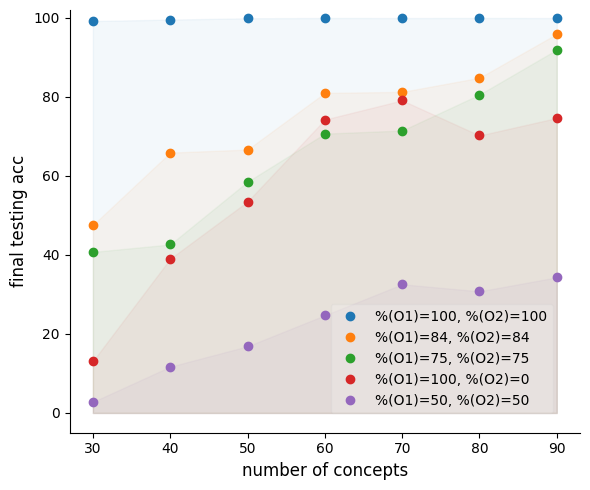

In [200]:
N = list(range(30, 91, 10))
Y = {
    "%(O1)=100, %(O2)=100": [99.21, 99.57, 99.91, 99.98, 99.97, 99.98, 99.97],
    "%(O1)=84, %(O2)=84": [47.55, 65.91, 66.67, 81.02, 81.28, 84.85, 95.95],
    "%(O1)=75, %(O2)=75": [40.76, 42.65, 58.53, 70.71, 71.49, 80.6, 91.97],
    "%(O1)=100, %(O2)=0": [13.1, 39.04, 53.51, 74.27, 79.13, 70.24, 74.67],
    "%(O1)=50, %(O2)=50": [2.79, 11.72, 16.88, 24.73, 32.58, 30.79, 34.34],
}
fig = plt.figure(figsize=(6, 5))
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_xlim(25, 95)
ax.set_ylim(-5, 102)
for i, s in enumerate(Y):
    ax.plot(N, Y[s], "o", label=s, c=CMAP[i])
    ax.fill_between(N, Y[s], np.zeros(len(N)), color=CMAP[i], alpha=0.05)
    #ci, x2, y2 = get_ci(N, Y[s])
    #ax.fill_between(x2, y2 + ci, y2 - ci, color=CMAP[i], alpha=0.1)
    #ax.plot(np.unique(N), np.poly1d(np.polyfit(N, Y[s], 1))(np.unique(N)), c=CMAP[i], alpha=0.5, linewidth=2)
plt.legend(loc='lower right', framealpha=0.2, bbox_to_anchor=(0.96, 0.03))
#plt.title("Incomplete Support")
ax.set_xlabel("number of concepts", fontsize=12)
ax.set_ylabel("final testing acc", fontsize=12)
plt.tight_layout()
plt.show()

In [201]:
fig.savefig(f"figures/image_skew_comleteness_progression.png", dpi=150)

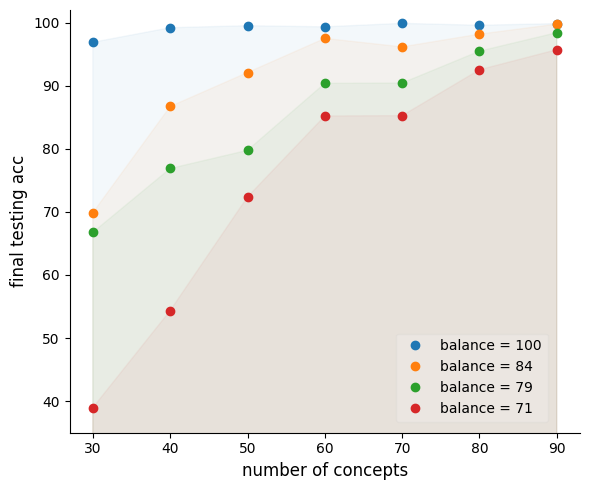

In [177]:
N = list(range(30, 91, 10))
Y = {
    "balance = 100": [96.88, 99.19, 99.51, 99.33, 99.88, 99.58, 99.84],
    "balance = 84": [69.87, 86.71, 92.09, 97.5, 96.16, 98.18, 99.76], 
    "balance = 79": [66.76, 76.88, 79.76, 90.38, 90.43, 95.48, 98.41],
    "balance = 71": [38.97, 54.36, 72.37, 85.2, 85.26, 92.53, 95.71],
}
fig = plt.figure(figsize=(6, 5))
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_prop_cycle(cycler('color', CMAP))
ax.set_ylim(35, 102)

for i, s in enumerate(Y):
    ax.plot(N, Y[s], "o", label=s, color=CMAP[i])
    ax.fill_between(N, Y[s], np.zeros(len(N)), color=CMAP[i], alpha=0.05)
    #ci, x2, y2 = get_ci(N, Y[s])
    #ax.fill_between(x2, y2 + ci, y2 - ci, color=CMAP[i], alpha=0.1)
    #ax.plot(np.unique(N[:-1]), np.poly1d(np.polyfit(N, Y[s], 1))(np.unique(N[:-1])), c=CMAP[i], alpha=0.5, linewidth=2)
annotations = sorted([(i[0], i[1][0], c) for i, c in zip(Y.items(), CMAP)], key=lambda x: x[1])
plt.legend(loc='lower right', framealpha=0.2, bbox_to_anchor=(0.95,0.01))
#plt.title("Incomplete Support")
ax.set_xlabel("number of concepts", fontsize=12)
ax.set_ylabel("final testing acc", fontsize=12)
plt.tight_layout()
plt.show()

In [178]:
fig.savefig(f"figures/image_skew_balance_progression.png", dpi=150)

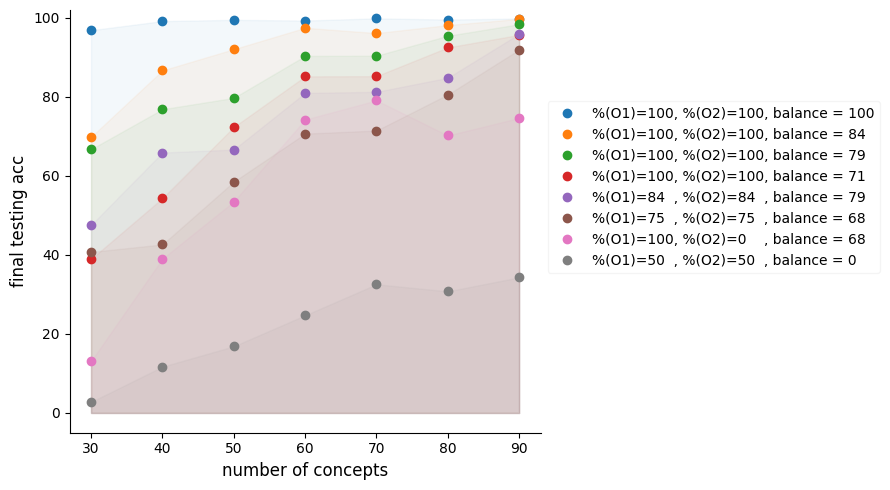

In [272]:
N = list(range(30, 91, 10))
Y = {
    #23: [99.21, 99.57, 99.91, 99.98, 99.97, 99.98, 99.97],
    24: [96.88, 99.19, 99.51, 99.33, 99.88, 99.58, 99.84],
    15: [69.87, 86.71, 92.09, 97.5, 96.16, 98.18, 99.76], 
    14: [66.76, 76.88, 79.76, 90.38, 90.43, 95.48, 98.41],
    2: [38.97, 54.36, 72.37, 85.2, 85.26, 92.53, 95.71],
    20: [47.55, 65.91, 66.67, 81.02, 81.28, 84.85, 95.95],
    17: [40.76, 42.65, 58.53, 70.71, 71.49, 80.6, 91.97],
    13: [13.1, 39.04, 53.51, 74.27, 79.13, 70.24, 74.67],
    12: [2.79, 11.72, 16.88, 24.73, 32.58, 30.79, 34.34],
}
labels = {
    12: "%(O1)=50  , %(O2)=50  , balance = 0",
    13: "%(O1)=100, %(O2)=0    , balance = 68",
    17: "%(O1)=75  , %(O2)=75  , balance = 68",
    20: "%(O1)=84  , %(O2)=84  , balance = 79",
    2: "%(O1)=100, %(O2)=100, balance = 71",
    14: "%(O1)=100, %(O2)=100, balance = 79",
    15: "%(O1)=100, %(O2)=100, balance = 84",
    24: "%(O1)=100, %(O2)=100, balance = 100",
    23: "%(O1)=100, %(O2)=100, balance = 100",
}
fig = plt.figure(figsize=(9, 5))
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_xlim(25, 95)
ax.set_ylim(-5, 102)
for i, s in enumerate(Y):
    ax.plot(N, Y[s], "o", label=labels[s], c=CMAP[i])
    ax.fill_between(N, Y[s], np.zeros(len(N)), color=CMAP[i], alpha=0.05)
    #ci, x2, y2 = get_ci(N, Y[s])
    #ax.fill_between(x2, y2 + ci, y2 - ci, color=CMAP[i], alpha=0.1)
    #ax.plot(np.unique(N), np.poly1d(np.polyfit(N, Y[s], 1))(np.unique(N)), c=CMAP[i], alpha=0.5, linewidth=2)
plt.legend(framealpha=0.2, bbox_to_anchor=(1, 0.8),)
#plt.title("Incomplete Support")
ax.set_xlabel("number of concepts", fontsize=12)
ax.set_ylabel("final testing acc", fontsize=12)
plt.tight_layout()
plt.show()

In [273]:
fig.savefig(f"figures/image_skew_combined_progression.png", dpi=150)

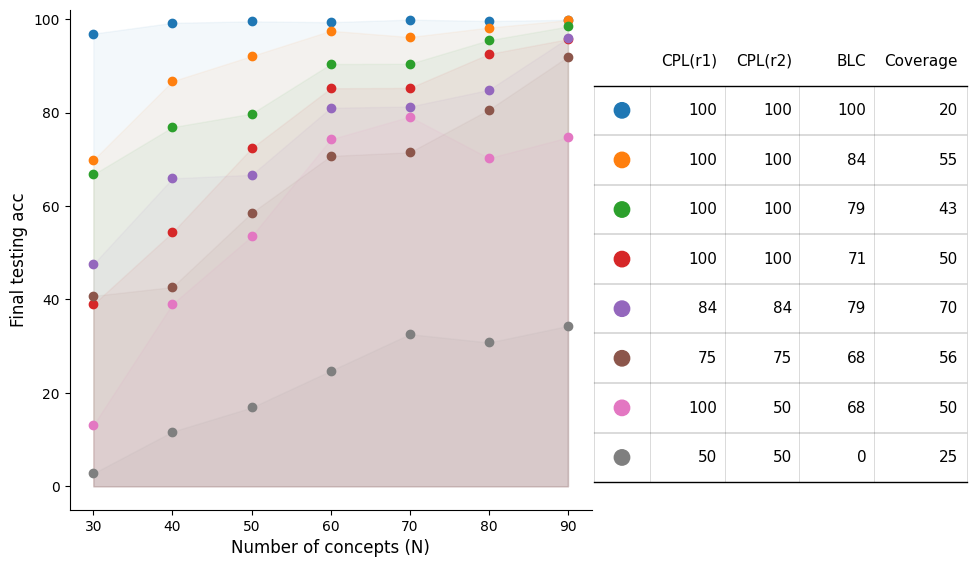

In [275]:
N = list(range(30, 91, 10))
Y = {
    #23: [99.21, 99.57, 99.91, 99.98, 99.97, 99.98, 99.97],
    24: [96.88, 99.19, 99.51, 99.33, 99.88, 99.58, 99.84],
    15: [69.87, 86.71, 92.09, 97.5, 96.16, 98.18, 99.76], 
    14: [66.76, 76.88, 79.76, 90.38, 90.43, 95.48, 98.41],
    2: [38.97, 54.36, 72.37, 85.2, 85.26, 92.53, 95.71],
    20: [47.55, 65.91, 66.67, 81.02, 81.28, 84.85, 95.95],
    17: [40.76, 42.65, 58.53, 70.71, 71.49, 80.6, 91.97],
    13: [13.1, 39.04, 53.51, 74.27, 79.13, 70.24, 74.67],
    12: [2.79, 11.72, 16.88, 24.73, 32.58, 30.79, 34.34],
}
labels = {
    12: "%(O1)=50  , %(O2)=50  , balance = 0",
    13: "%(O1)=100, %(O2)=50  , balance = 68",
    17: "%(O1)=75  , %(O2)=75  , balance = 68",
    20: "%(O1)=84  , %(O2)=84  , balance = 79",
    2: "%(O1)=100, %(O2)=100, balance = 71",
    14: "%(O1)=100, %(O2)=100, balance = 79",
    15: "%(O1)=100, %(O2)=100, balance = 84",
    24: "%(O1)=100, %(O2)=100, balance = 100",
    23: "%(O1)=100, %(O2)=100, balance = 100",
}

column_names = ["legend", "%(O1)", "%(O2)", "Balance", "Coverage"]
df = pd.DataFrame(columns=column_names)

#fig, axs = plt.subplots(1, 2, figsize=(10,5), width_ratios=[3, 2])
fig = plt.figure(figsize=(9, 5))
ax = plt.axes([0, 0.05, 0.58, 1]) #axs[0]
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_xlim(25, 95)
ax.set_ylim(-5, 102)
for i, s in enumerate(Y):
    ax.plot(N, Y[s], "o", c=CMAP[i])
    ax.fill_between(N, Y[s], np.zeros(len(N)), color=CMAP[i], alpha=0.05)
    #row = pd.Series([f"split{s}"] + [x.split("=")[1].strip() for x in labels[s].split(", ")] + [coverage[f"split{s}"]], index=df.columns)

    df.loc[i] = [i] + [x.split("=")[1].strip() for x in labels[s].split(", ")] + [int(100*coverage[f"split{s}"])]
df = df.set_index("legend")
#ax.legend(framealpha=0.2, bbox_to_anchor=(1, 0.8),)
ax.set_xlabel("Number of concepts (N)", fontsize=12)
ax.set_ylabel("Final testing acc", fontsize=12)

ax = plt.axes([0.58, 0.1, 0.42, 0.9]) #axs[1] #fig.add_subplot(122)
#ax.margins(0.5, 0.5)

col_defs = [ColumnDefinition(
            name="legend",
            #title="",
            border="left",
            width=0.6,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.05},
                "alpha": 0,
            },
            cmap=matplotlib.cm.tab10, #normed_cmap(df['legend'], cmap=matplotlib.cm.tab10, num_stds=2.5),
        ),
        ColumnDefinition(
            name="%(O1)",
            title="CPL(r1)",
            border="left",
            width=0.8,
            textprops={"ha": "right", "fontsize": 11,},
        ),
        ColumnDefinition(
            name="%(O2)",
            title="CPL(r2)",
            border="left",
            width=0.8,
            textprops={"ha": "right", "fontsize": 11,},
        ),
        ColumnDefinition(
            name="Balance",
            title="BLC",
            border="left",
            width=0.8,
            textprops={"ha": "right", "fontsize": 11,},
        ), 
        ColumnDefinition(
            name="Coverage",
            title="Coverage",
            border="left right",
            textprops={"ha": "right", "fontsize": 11},
        )]
tab = Table(df,
            ax=ax,
            column_definitions = col_defs,
            column_border_kw={"linewidth": 0.5, "color": "black", "linestyle": "-", "alpha": 0.2},
            footer_divider=True,
            )

#plt.tight_layout()
plt.show()

In [276]:
fig.savefig(f"figures/image_skew_progression_and_table.png", bbox_inches='tight', dpi=150)

### Linguistic Skew

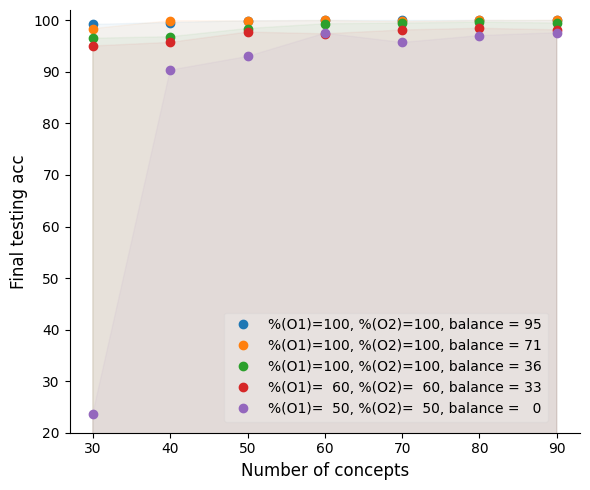

In [4]:
N = list(range(30, 91, 10))

Y = {
    "%(O1)=100, %(O2)=100, balance = 95": [99.21, 99.57, 99.91, 99.98, 99.97, 99.98, 99.97],
    "%(O1)=100, %(O2)=100, balance = 71": [98.39, 99.94, 99.88, 99.97, 99.77, 99.97, 100],
    "%(O1)=100, %(O2)=100, balance = 36": [96.52, 96.82, 98.41, 99.33, 99.47, 99.64, 99.48],
    "%(O1)=  60, %(O2)=  60, balance = 33": [95.02, 95.72, 97.72, 97.38, 98.12, 98.45, 98.15], 
    "%(O1)=  50, %(O2)=  50, balance =   0": [23.72, 90.34, 92.99, 97.51, 95.7, 97.04, 97.59],
}

fig = plt.figure(figsize=(6, 5))
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_prop_cycle(cycler('color', CMAP))
ax.set_ylim(20, 102)

for i, s in enumerate(Y):
    ax.plot(N, Y[s], "o", label=s)
    #ci, x2, y2 = get_ci(N, Y[s], 0.9)
    #ax.fill_between(x2, y2 + ci, y2 - ci, color=CMAP[i], alpha=0.1)
    ax.fill_between(N, Y[s], np.zeros(len(N)), color=CMAP[i], alpha=0.05)
    #ax.plot(np.unique(N[:-1]), np.poly1d(np.polyfit(N, Y[s], 1))(np.unique(N[:-1])), c=CMAP[i], alpha=0.5, linewidth=2)
annotations = sorted([(i[0], i[1][0], c) for i, c in zip(Y.items(), CMAP)], key=lambda x: x[1])
plt.legend(loc='lower right', framealpha=0.2, bbox_to_anchor=(0.95, 0.01))
#plt.title("Incomplete Support")
ax.set_xlabel("Number of concepts", fontsize=12)
ax.set_ylabel("Final testing acc", fontsize=12)
plt.tight_layout()
plt.show()

In [5]:
fig.savefig(f"figures/linguistic_skew_combined_progression1.png", dpi=200)

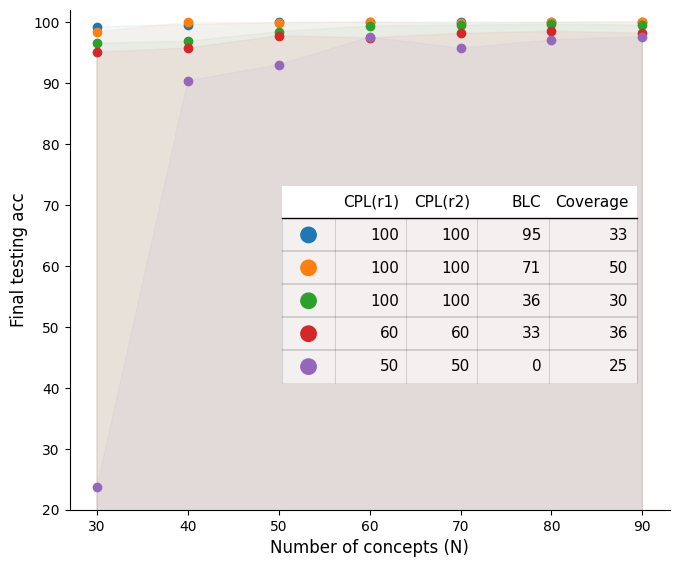

In [6]:
N = list(range(30, 91, 10))
Y = {
    23: [99.21, 99.57, 99.91, 99.98, 99.97, 99.98, 99.97],
    7: [98.39, 99.94, 99.88, 99.97, 99.77, 99.97, 100],
    21: [96.52, 96.82, 98.41, 99.33, 99.47, 99.64, 99.48],
    19: [95.02, 95.72, 97.72, 97.38, 98.12, 98.45, 98.15], 
    5: [23.72, 90.34, 92.99, 97.51, 95.7, 97.04, 97.59],
}

labels = {
    5: "%(O1)=50  , %(O2)=50  , balance = 0",
    19: "%(O1)=60  , %(O2)=60  , balance = 33",
    21: "%(O1)=100, %(O2)=100, balance = 36",
    7: "%(O1)=100, %(O2)=100, balance = 71",
    23: "%(O1)=100, %(O2)=100, balance = 95",
}
column_names = ["legend", "%(O1)", "%(O2)", "Balance", "Coverage"]
df = pd.DataFrame(columns=column_names)

fig = plt.figure(figsize=(6, 5))
ax = plt.axes([0, 0.05, 1, 1]) #axs[0]

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_prop_cycle(cycler('color', CMAP))
ax.set_ylim(20, 102)

for i, s in enumerate(Y):
    ax.plot(N, Y[s], "o", label=s)
    ax.fill_between(N, Y[s], np.zeros(len(N)), color=CMAP[i], alpha=0.05)
    df.loc[i] = [i] + [x.split("=")[1].strip() for x in labels[s].split(", ")] + [int(100*coverage[f"split{s}"])]
df = df.set_index("legend")
ax.set_xlabel("Number of concepts (N)", fontsize=12)
ax.set_ylabel("Final testing acc", fontsize=12)

ax = plt.axes([0.35, 0.3, 0.6, 0.4]) #axs[1] #fig.add_subplot(122)

col_defs = [ColumnDefinition(
            name="legend",
            #title="",
            border="left",
            width=0.6,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.05},
                "alpha": 0,
            },
            cmap=matplotlib.cm.tab10, #normed_cmap(df['legend'], cmap=matplotlib.cm.tab10, num_stds=2.5),
        ),
        ColumnDefinition(
            name="%(O1)",
            title="CPL(r1)",
            border="left",
            width=0.8,
            textprops={"ha": "right", "fontsize": 11,},
        ),
        ColumnDefinition(
            name="%(O2)",
            title="CPL(r2)",
            border="left",
            width=0.8,
            textprops={"ha": "right", "fontsize": 11,},
        ),
        ColumnDefinition(
            name="Balance",
            title="BLC",
            border="left",
            width=0.8,
            textprops={"ha": "right", "fontsize": 11,},
        ), 
        ColumnDefinition(
            name="Coverage",
            title="Coverage",
            border="left right",
            textprops={"ha": "right", "fontsize": 11},
        )]
tab = Table(df,
            ax=ax,
            column_definitions = col_defs,
            column_border_kw={"linewidth": 0.5, "color": "black", "linestyle": "-", "alpha": 0.2},
            #footer_divider=True,
            cell_kw={"alpha": 0.6}
            )
plt.show()

In [7]:
fig.savefig(f"figures/linguistic_skew_progression_and_table1.png", bbox_inches='tight',  dpi=200)

### Image Skew delayed generalization

In [277]:
def get_data_teacc_score(split, EPC, N, transpose=False):
    df = pd.read_csv(f"../data/sheets_icons/diffuser_icons_experiments - {split}.csv",
                    header=0,
                    )
    df = df.dropna(axis='rows', subset='Epoch')
    df.set_index("Epoch", inplace=True)
    df.index = df.index.astype(int)
    od = df.to_dict(into=OrderedDict)
    data = []

    for n in df.columns.to_list():
        if "num_objs=" in n and not '[' in n:
            num_nouns = int(re.findall(r'num_objs=(\d+)', n)[0])
            if num_nouns not in N: continue
            df = create_synthetic_df(split, num_nouns, transpose=transpose)
            gap = 0
            TEACC, TRACC = [], []
            for epc in EPC:
                if not epc in od[n]: continue
                record = od[n][epc]
                if isinstance(record, NumberTypes) and math.isnan(record): 
                    break
                try: teacc, tracc = re.findall(r'(\d*\.?\d+)\s+tr acc\s?=\s?(\d*\.?\d+)', record)[0]
                except:
                    print(f"failed to regex teacc and tracc from record: {record}")
                    raise
                TEACC.append(float(teacc))
                TRACC.append(float(tracc))
            gap = np.sum([r-e for r, e in zip(TRACC, TEACC)])
            data.append((gap/len(TEACC), num_nouns))
    res = [x[0] for x in sorted(data, key=lambda i: i[-1])]
    return res
    

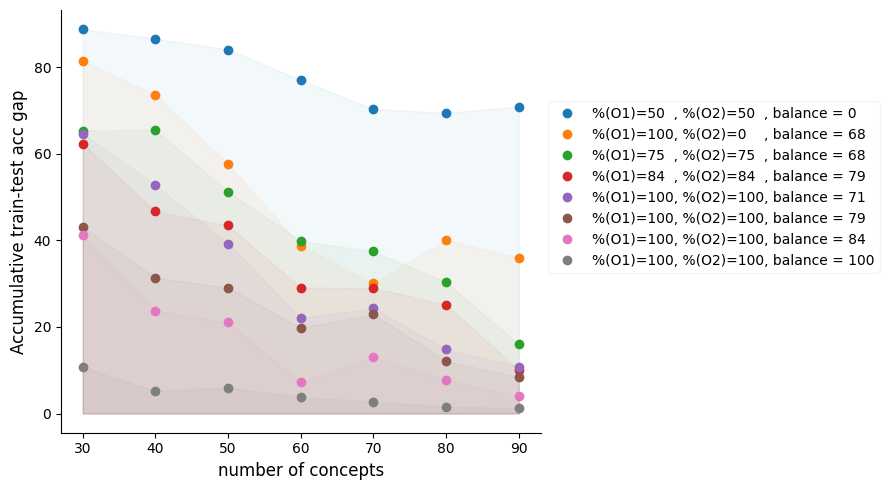

In [278]:
EPC = list(range(19, 600, 20))
N = list(range(30, 91, 10))

labels = {
    12: "%(O1)=50  , %(O2)=50  , balance = 0",
    13: "%(O1)=100, %(O2)=0    , balance = 68",
    17: "%(O1)=75  , %(O2)=75  , balance = 68",
    20: "%(O1)=84  , %(O2)=84  , balance = 79",
    2: "%(O1)=100, %(O2)=100, balance = 71",
    14: "%(O1)=100, %(O2)=100, balance = 79",
    15: "%(O1)=100, %(O2)=100, balance = 84",
    24: "%(O1)=100, %(O2)=100, balance = 100",
}

fig = plt.figure(figsize=(9, 5))
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
prev_Y = np.zeros(len(N))

for j, s in enumerate(reversed([24,15,14,2,20,17,13,12])): #[3,7,2,8,4,5,6,23,19,21,12,13,17,20,14,15,24,22]):
    
    split = f"split{s}"
    Y = get_data_teacc_score(split, EPC, N)        
    
    ax.plot(N, Y, "o", label=labels[s], color=CMAP[j])
    ax.fill_between(N, Y, np.zeros(len(N)), color=CMAP[j], alpha=0.05)
    #prev_Y = Y
    #ci, x2, y2 = get_ci(N, Y, 0.9)
    #ax.fill_between(x2, y2 + ci, y2 - ci, color=CMAP[j], alpha=0.1)
ax.set_xlabel("number of concepts", fontsize=12)
ax.set_ylabel("Accumulative train-test acc gap", fontsize=12)
ax.legend(framealpha=0.2, bbox_to_anchor=(1, 0.8),)

fig.tight_layout()
plt.show()


In [279]:
fig.savefig(f"figures/image_skew_gap.png", dpi=150)

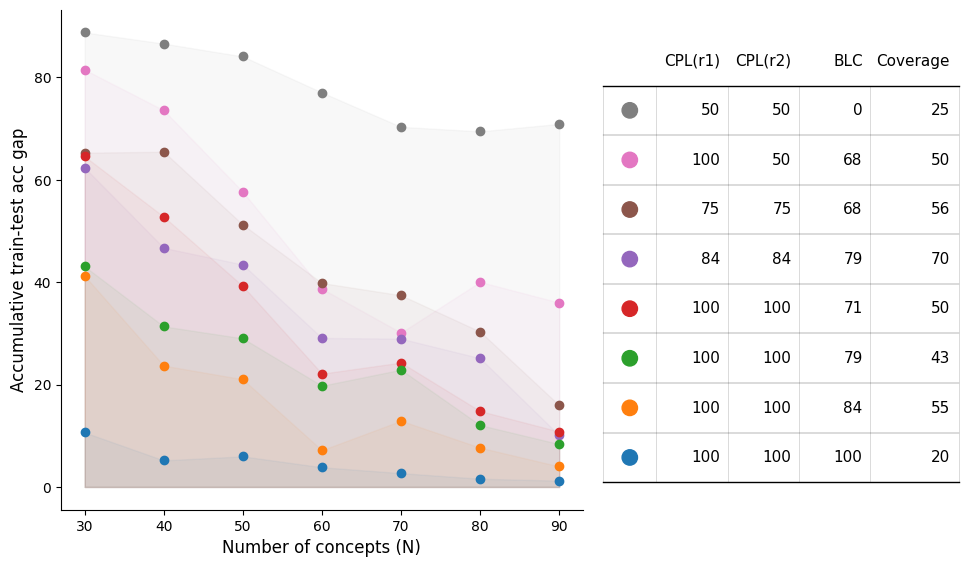

In [280]:
EPC = list(range(19, 600, 20))
N = list(range(30, 91, 10))

labels = {
    12: "%(O1)=50  , %(O2)=50  , balance = 0",
    13: "%(O1)=100, %(O2)=50  , balance = 68",
    17: "%(O1)=75  , %(O2)=75  , balance = 68",
    20: "%(O1)=84  , %(O2)=84  , balance = 79",
    2: "%(O1)=100, %(O2)=100, balance = 71",
    14: "%(O1)=100, %(O2)=100, balance = 79",
    15: "%(O1)=100, %(O2)=100, balance = 84",
    24: "%(O1)=100, %(O2)=100, balance = 100",
}

column_names = ["legend", "%(O1)", "%(O2)", "Balance", "Coverage"]
df = pd.DataFrame(columns=column_names)

fig = plt.figure(figsize=(9, 5))
ax = plt.axes([0, 0.05, 0.58, 1]) #axs[0]
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for j, s in enumerate(reversed([24,15,14,2,20,17,13,12])): #[3,7,2,8,4,5,6,23,19,21,12,13,17,20,14,15,24,22]):
    
    split = f"split{s}"
    Y = get_data_teacc_score(split, EPC, N)        
    
    ax.plot(N, Y, "o", label=labels[s], color=CMAP[len(labels)-j-1])
    ax.fill_between(N, Y, np.zeros(len(N)), color=CMAP[len(labels)-j-1], alpha=0.05)
    df.loc[j] = [len(labels)-j-1] + [x.split("=")[1].strip() for x in labels[s].split(", ")] + [int(100*coverage[f"split{s}"])]
df = df.set_index("legend")
ax.set_xlabel("Number of concepts (N)", fontsize=12)
ax.set_ylabel("Accumulative train-test acc gap", fontsize=12)

ax = plt.axes([0.6, 0.1, 0.4, 0.9]) #axs[1] #fig.add_subplot(122)

col_defs = [ColumnDefinition(
            name="legend",
            #title="",
            border="left",
            width=0.6,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.05},
                "alpha": 0,
            },
            cmap=matplotlib.cm.tab10, #normed_cmap(df['legend'], cmap=matplotlib.cm.tab10, num_stds=2.5),
        ),
        ColumnDefinition(
            name="%(O1)",
            title="CPL(r1)",
            border="left",
            width=0.8,
            textprops={"ha": "right", "fontsize": 11,},
        ),
        ColumnDefinition(
            name="%(O2)",
            title="CPL(r2)",
            border="left",
            width=0.8,
            textprops={"ha": "right", "fontsize": 11,},
        ),
        ColumnDefinition(
            name="Balance",
            title="BLC",
            border="left",
            width=0.8,
            textprops={"ha": "right", "fontsize": 11,},
        ), 
        ColumnDefinition(
            name="Coverage",
            title="Coverage",
            border="left right",
            textprops={"ha": "right", "fontsize": 11},
        )]
tab = Table(df,
            ax=ax,
            column_definitions = col_defs,
            column_border_kw={"linewidth": 0.5, "color": "black", "linestyle": "-", "alpha": 0.2},
            footer_divider=True,
            )

plt.show()


In [281]:
fig.savefig(f"figures/image_skew_gap_and_table.png", bbox_inches='tight', dpi=150)

### Linguistic Skew delayed generalization

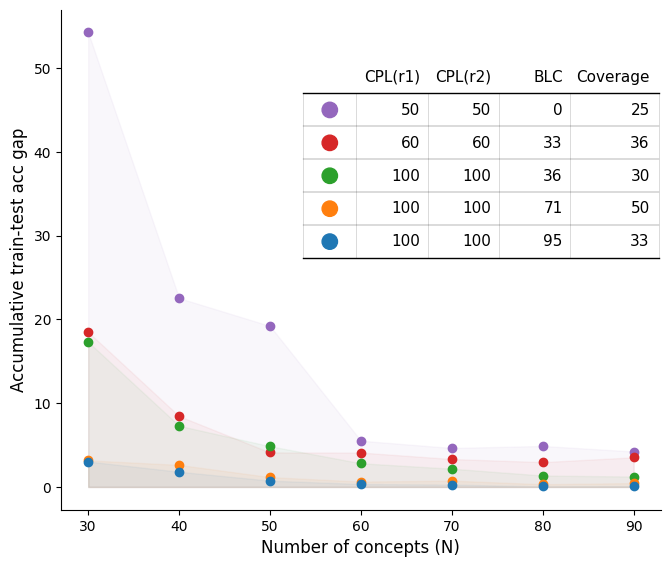

In [9]:
EPC = list(range(19, 600, 20))
N = list(range(30, 91, 10))

column_names = ["legend", "%(O1)", "%(O2)", "Balance", "Coverage"]
df = pd.DataFrame(columns=column_names)

fig = plt.figure(figsize=(6, 5))
ax = plt.axes([0, 0.05, 1, 1]) #axs[0]
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

labels = {
    5: "%(O1)=50  , %(O2)=50  , balance = 0",
    19: "%(O1)=60  , %(O2)=60  , balance = 33",
    21: "%(O1)=100, %(O2)=100, balance = 36",
    7: "%(O1)=100, %(O2)=100, balance = 71",
    23: "%(O1)=100, %(O2)=100, balance = 95",
}
for j, s in enumerate([5,19,21,7,23]): #[3,7,2,8,4,5,6,23,19,21,12,13,17,20,14,15,24,22]):
    
    split = f"split{s}"
    Y = get_data_teacc_score(split, EPC, N)        
    
    ax.plot(N, Y, "o", label=labels[s], color=CMAP[len(labels)-j-1])
    ax.fill_between(N, Y, np.zeros(len(N)), color=CMAP[len(labels)-j-1], alpha=0.05)
    df.loc[j] = [len(labels)-j-1] + [x.split("=")[1].strip() for x in labels[s].split(", ")] + [int(100*coverage[f"split{s}"])]
df = df.set_index("legend")
ax.set_xlabel("Number of concepts (N)", fontsize=12)
ax.set_ylabel("Accumulative train-test acc gap", fontsize=12)

ax = plt.axes([0.4, 0.55, 0.6, 0.4]) #axs[1] #fig.add_subplot(122)

col_defs = [ColumnDefinition(
            name="legend",
            #title="",
            border="left",
            width=0.6,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.05},
                "alpha": 0,
            },
            cmap=matplotlib.cm.tab10, #normed_cmap(df['legend'], cmap=matplotlib.cm.tab10, num_stds=2.5),
        ),
        ColumnDefinition(
            name="%(O1)",
            title="CPL(r1)",
            border="left",
            width=0.8,
            textprops={"ha": "right", "fontsize": 11,},
        ),
        ColumnDefinition(
            name="%(O2)",
            title="CPL(r2)",
            border="left",
            width=0.8,
            textprops={"ha": "right", "fontsize": 11,},
        ),
        ColumnDefinition(
            name="Balance",
            title="BLC",
            border="left",
            width=0.8,
            textprops={"ha": "right", "fontsize": 11,},
        ), 
        ColumnDefinition(
            name="Coverage",
            title="Coverage",
            border="left right",
            textprops={"ha": "right", "fontsize": 11},
        )]
tab = Table(df,
            ax=ax,
            column_definitions = col_defs,
            column_border_kw={"linewidth": 0.5, "color": "black", "linestyle": "-", "alpha": 0.2},
            footer_divider=True,
            )

plt.show()


In [10]:
fig.savefig(f"figures/linguistic_skew_gap_and_table1.png", bbox_inches='tight', dpi=200)

## Ablation

In [339]:
def get_acc_along_epochs(split, EPC, N, threshold=0.8, transpose=False):
    df = pd.read_csv(f"../data/sheets_icons/diffuser_icons_experiments - {split}.csv",
                    header=0,
                    )
    df = df.dropna(axis='rows', subset='Epoch')
    df.set_index("Epoch", inplace=True)
    df.index = df.index.astype(int)
    od = df.to_dict(into=OrderedDict)
    data = {}

    for n in df.columns.to_list():
        if "num_objs=" in n and not '[' in n:
            num_nouns = int(re.findall(r'num_objs=(\d+)', n)[0])
            if num_nouns not in N: continue
            df = create_synthetic_df(split, num_nouns, transpose=transpose)
            gap = 0
            TEACC, TRACC = [], []
            for epc in EPC:
                if not epc in od[n]: continue
                record = od[n][epc]
                if isinstance(record, NumberTypes) and math.isnan(record): 
                    break
                try: teacc, tracc = re.findall(r'(\d*\.?\d+)\s+tr acc\s?=\s?(\d*\.?\d+)', record)[0]
                except:
                    print(f"failed to regex teacc and tracc from record: {record}")
                    raise
                #print(teacc, TEACC)
                teacc, tracc = float(teacc), float(tracc)
                if len(TEACC)==0 or teacc >= threshold+TEACC[-1][1]: TEACC.append([epc, teacc])
                if len(TRACC)==0 or tracc >= threshold+TRACC[-1][1]: TRACC.append([epc, tracc])
            TEACC.append([EPC[-1], TEACC[-1][1]])
            TRACC.append([EPC[-1], TRACC[-1][1]])
            data[num_nouns] = (TEACC, TRACC)
    # res = [x[0] for x in sorted(data, key=lambda i: i[-1])]
    return data
    

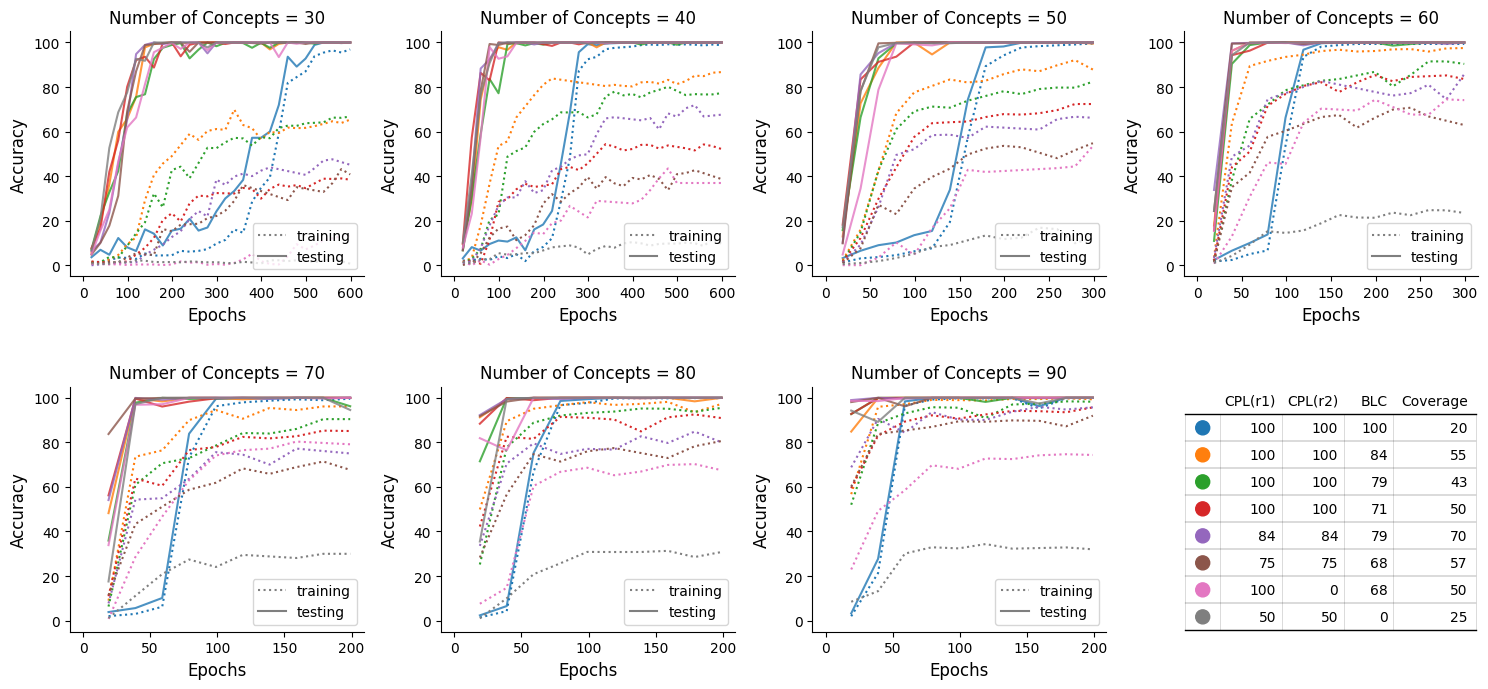

In [340]:
colors = list(matplotlib.colormaps['tab10'].colors)
CMAP = colors + ['navy', 'olive', 'peru', 'deeppink', 'lightgreen']#, 'limegreen', 'gold', 'aqua', 'mediumorchid', 'darkred', 'teal']
#CMAP = CMAP[::-1]
EPC = {
    30: list(range(19, 600, 20)),
    40: list(range(19, 600, 20)),
    50: list(range(19, 300, 20)),
    60: list(range(19, 300, 20)),
    70: list(range(19, 200, 20)),
    80: list(range(19, 200, 20)),
    90: list(range(19, 200, 20))
}
N = list(range(30, 91, 10))

labels = {
    12: "%(O1)=50  , %(O2)=50  , balance=0    , coverage=25",
    13: "%(O1)=100, %(O2)=0    , balance=68  , coverage=50",
    17: "%(O1)=75  , %(O2)=75  , balance=68  , coverage=57",
    20: "%(O1)=84  , %(O2)=84  , balance=79  , coverage=70",
    2: "%(O1)=100, %(O2)=100, balance=71  , coverage=50",
    14: "%(O1)=100, %(O2)=100, balance=79  , coverage=43",
    15: "%(O1)=100, %(O2)=100, balance=84  , coverage=55",
    24: "%(O1)=100, %(O2)=100, balance=100, coverage=20",
}

fig = plt.figure(figsize=(15, 7))
column_names = ["legend", "%(O1)", "%(O2)", "Balance", "Coverage"]
df = pd.DataFrame(columns=column_names)

threshold=-7
for i, num_nouns in enumerate(N):
    ax = fig.add_subplot(2, 4, i+1)
    for j, s in enumerate([24,15,14,2,20,17,13,12]): #[3,7,2,8,4,5,6,23,19,21,12,13,17,20,14,15,24,22]):
        df.loc[j] = [j] + [x.split("=")[1].strip() for x in labels[s].split(", ")]
        split = f"split{s}"
        TEACC, TRACC = get_acc_along_epochs(split, EPC[num_nouns], N, threshold)[num_nouns]        
        #assert len(TEACC) == len(EPC) and len(TRACC) == len(EPC)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if s == 12:
            ax.plot([0,0], [0,0], ":", label="training", alpha=0.5, color="black")
            ax.plot([0,0], [0,0], "-", label="testing", alpha=0.5, color="black")
        ax.plot([t[0] for t in TEACC], [t[1] for t in TEACC], ":", color=CMAP[j])
        ax.plot([t[0] for t in TRACC], [t[1] for t in TRACC], "-", color=CMAP[j], alpha=0.8)
    ax.set_title(f"Number of Concepts = {num_nouns}")
    ax.set_xlabel("Epochs", fontsize=12)
    ax.set_ylabel("Accuracy", fontsize=12)
    ax.legend(framealpha=0.8, loc='lower right')#, bbox_to_anchor=(1, 0.8))


ax = fig.add_subplot(2, 4, 8)
df = df.set_index("legend")
col_defs = [ColumnDefinition(
            name="legend",
            #title="",
            border="left",
            width=0.5,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.0},
                "alpha": 0,
            },
            cmap=matplotlib.cm.tab10, #normed_cmap(df['legend'], cmap=matplotlib.cm.tab10, num_stds=2.5),
        ),
        ColumnDefinition(
            name="%(O1)",
            title="CPL(r1)",
            border="left",
            width=0.9,
            textprops={"ha": "right", "fontsize": 10,},
        ),
        ColumnDefinition(
            name="%(O2)",
            title="CPL(r2)",
            border="left",
            width=0.9,
            textprops={"ha": "right", "fontsize": 10,},
        ),
        ColumnDefinition(
            name="Balance",
            title="BLC",
            border="left",
            width=0.7,
            textprops={"ha": "right", "fontsize": 10,},
        ), 
        ColumnDefinition(
            name="Coverage",
            title="Coverage",
            border="left right",
            width=1.2,
            textprops={"ha": "right", "fontsize": 10},
        )]
tab = Table(df,
            ax=ax,
            column_definitions = col_defs,
            column_border_kw={"linewidth": 0.5, "color": "black", "linestyle": "-", "alpha": 0.2},
            footer_divider=True,
            )
ax.set_axis_off()

fig.tight_layout()
plt.subplots_adjust(hspace = 0.45)
plt.show()


In [341]:
fig.savefig(f"figures/image_skew_separated.png", bbox_inches='tight', dpi=200)

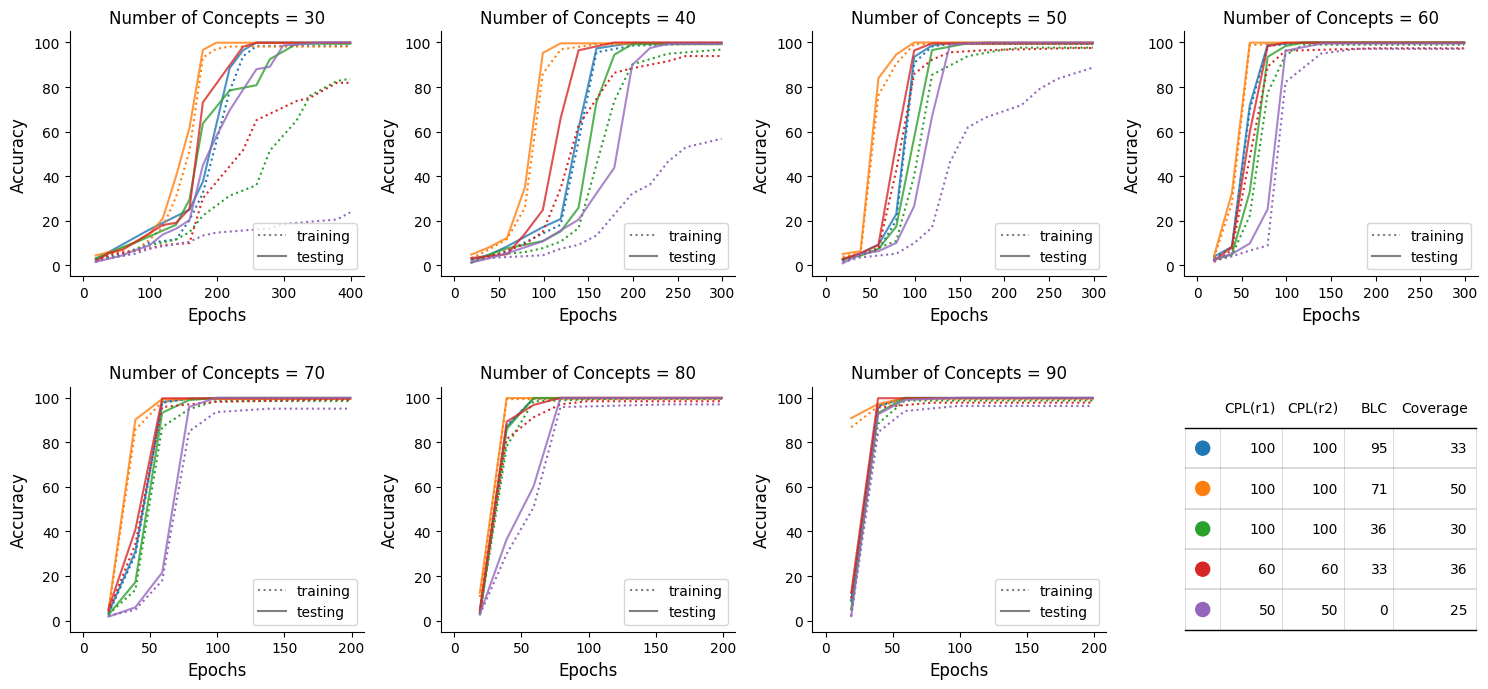

In [342]:
colors = list(matplotlib.colormaps['tab10'].colors)
CMAP = colors + ['navy', 'olive', 'peru', 'deeppink', 'lightgreen']#, 'limegreen', 'gold', 'aqua', 'mediumorchid', 'darkred', 'teal']
#CMAP = CMAP[::-1]
EPC = {
    30: list(range(19, 400, 20)),
    40: list(range(19, 300, 20)),
    50: list(range(19, 300, 20)),
    60: list(range(19, 300, 20)),
    70: list(range(19, 200, 20)),
    80: list(range(19, 200, 20)),
    90: list(range(19, 200, 20))
}
N = list(range(30, 91, 10))

labels = {
    5: "%(O1)=50  , %(O2)=50  , balance=0  , coverage=25",
    19: "%(O1)=60  , %(O2)=60  , balance=33, coverage=36",
    21: "%(O1)=100, %(O2)=100, balance=36, coverage=30",
    7: "%(O1)=100, %(O2)=100, balance=71, coverage=50",
    23: "%(O1)=100, %(O2)=100, balance=95, coverage=33",
}
fig = plt.figure(figsize=(15, 7))
column_names = ["legend", "%(O1)", "%(O2)", "Balance", "Coverage"]
df = pd.DataFrame(columns=column_names)

threshold=0.9
for i, num_nouns in enumerate(N):
    ax = fig.add_subplot(2, 4, i+1)
    for j, s in enumerate(reversed([5,19,21,7,23])): #[3,7,2,8,4,5,6,23,19,21,12,13,17,20,14,15,24,22]):
        df.loc[j] = [j] + [x.split("=")[1].strip() for x in labels[s].split(", ")]
        split = f"split{s}"
        TEACC, TRACC = get_acc_along_epochs(split, EPC[num_nouns], N, threshold)[num_nouns]        
        #assert len(TEACC) == len(EPC) and len(TRACC) == len(EPC)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if s == 5:
            ax.plot([0,0], [0,0], ":", label="training", alpha=0.5, color="black")
            ax.plot([0,0], [0,0], "-", label="testing", alpha=0.5, color="black")
        ax.plot([t[0] for t in TEACC], [t[1] for t in TEACC], ":", color=CMAP[j])
        ax.plot([t[0] for t in TRACC], [t[1] for t in TRACC], "-", color=CMAP[j], alpha=0.8)
    ax.set_title(f"Number of Concepts = {num_nouns}")
    ax.set_xlabel("Epochs", fontsize=12)
    ax.set_ylabel("Accuracy", fontsize=12)
    ax.legend(framealpha=0.8, loc='lower right')#, bbox_to_anchor=(1, 0.8))

ax = fig.add_subplot(2, 4, 8)
df = df.set_index("legend")
col_defs = [ColumnDefinition(
            name="legend",
            #title="",
            border="left",
            width=0.5,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.0},
                "alpha": 0,
            },
            cmap=matplotlib.cm.tab10, #normed_cmap(df['legend'], cmap=matplotlib.cm.tab10, num_stds=2.5),
        ),
        ColumnDefinition(
            name="%(O1)",
            title="CPL(r1)",
            border="left",
            width=0.9,
            textprops={"ha": "right", "fontsize": 10,},
        ),
        ColumnDefinition(
            name="%(O2)",
            title="CPL(r2)",
            border="left",
            width=0.9,
            textprops={"ha": "right", "fontsize": 10,},
        ),
        ColumnDefinition(
            name="Balance",
            title="BLC",
            border="left",
            width=0.7,
            textprops={"ha": "right", "fontsize": 10,},
        ), 
        ColumnDefinition(
            name="Coverage",
            title="Coverage",
            border="left right",
            width=1.2,
            textprops={"ha": "right", "fontsize": 10},
        )]
tab = Table(df,
            ax=ax,
            column_definitions = col_defs,
            column_border_kw={"linewidth": 0.5, "color": "black", "linestyle": "-", "alpha": 0.2},
            footer_divider=True,
            )
ax.set_axis_off()

fig.tight_layout()
plt.subplots_adjust(hspace = 0.45)
plt.show()


In [343]:
fig.savefig(f"figures/linguistic_skew_separated.png", bbox_inches='tight', dpi=200)

## Image Positional Embeddings

In [71]:
labels = {
    12: "%(O1)=50  , %(O2)=50  , balance=0    , coverage=25",
    13: "%(O1)=100, %(O2)=0    , balance=68  , coverage=50",
    17: "%(O1)=75  , %(O2)=75  , balance=68  , coverage=57",
    20: "%(O1)=84  , %(O2)=84  , balance=79  , coverage=70",
    2: "%(O1)=100, %(O2)=100, balance=71  , coverage=50",
    14: "%(O1)=100, %(O2)=100, balance=79  , coverage=43",
    15: "%(O1)=100, %(O2)=100, balance=84  , coverage=55",
    24: "%(O1)=100, %(O2)=100, balance = 100, coverage=20",
    22: "%(O1)=100, %(O2)=100, balance = 100, coverage=33",
    8: "%(O1)=100, %(O2)=100, balance = 100, coverage=50",
    5: "%(O1)=50  , %(O2)=50  , balance=0    , coverage=25",
    19: "%(O1)=60  , %(O2)=60  , balance=33  , coverage=36",
    21: "%(O1)=100, %(O2)=100, balance=36  , coverage=30",
    7: "%(O1)=100, %(O2)=100, balance=71  , coverage=50",
    23: "%(O1)=100, %(O2)=100, balance=100  , coverage=33",
}

In [72]:
def get_acc_along_epochs(split, EPC, N, threshold=0.8):
    df = pd.read_csv(f"../data/sheets_icons/diffuser_icons_experiments - {split}.csv",
                    header=0,
                    )
    df = df.dropna(axis='rows', subset='Epoch')
    df.set_index("Epoch", inplace=True)
    df.index = df.index.astype(int)
    od = df.to_dict(into=OrderedDict)

    POS, NOPOS = {}, {}
    for n in df.columns.to_list():
        if "num_objs=" in n and not '[' in n:
            num_nouns = int(re.findall(r'num_objs=(\d+)', n)[0])
            if not num_nouns in N: continue
            tmp = [x for x in df.columns.to_list() if f"num_objs={num_nouns}\n[no image_pos_enc]" in x]
            #if "0222_103800" in n: print(df.columns.to_list())
            if len(tmp) == 0: continue
            else: nopos_handle = tmp[0]
            
            TEACC, TRACC = [], []
            for epc in EPC:
                if not epc in od[n]: continue
                record = od[n][epc]
                if isinstance(record, NumberTypes) and math.isnan(record): 
                    break
                try: teacc, tracc = re.findall(r'(\d*\.?\d+)\s+tr acc\s?=\s?(\d*\.?\d+)', record)[0]
                except:
                    print(f"failed to regex teacc and tracc from record: {record}")
                    raise
                teacc, tracc = float(teacc), float(tracc)
                if len(TEACC)==0 or teacc >= threshold+TEACC[-1][1]: TEACC.append([epc, teacc])
                if len(TRACC)==0 or tracc >= threshold+TRACC[-1][1]: TRACC.append([epc, tracc])
            if len(TEACC) < len(EPC): TEACC.append([EPC[-1], TEACC[-1][1]])
            if len(TRACC) < len(EPC): TRACC.append([EPC[-1], TRACC[-1][1]])
            POS[f"{split}-{num_nouns}"] = (TEACC, TRACC)
            
            n = nopos_handle
            TEACC, TRACC = [], []
            for epc in EPC:
                if not epc in od[n]: continue
                record = od[n][epc]
                if isinstance(record, NumberTypes) and math.isnan(record): 
                    break
                try: teacc, tracc = re.findall(r'(\d*\.?\d+)\s+tr acc\s?=\s?(\d*\.?\d+)', record)[0]
                except:
                    print(f"failed to regex teacc and tracc from record: {record}")
                    raise
                teacc, tracc = float(teacc), float(tracc)
                if len(TEACC)==0 or teacc >= threshold+TEACC[-1][1]: TEACC.append([epc, teacc])
                if len(TRACC)==0 or tracc >= threshold+TRACC[-1][1]: TRACC.append([epc, tracc])
            if len(TEACC) < len(EPC): TEACC.append([EPC[-1], TEACC[-1][1]])
            if len(TRACC) < len(EPC): TRACC.append([EPC[-1], TRACC[-1][1]])
            NOPOS[f"{split}-{num_nouns}"] = (TEACC, TRACC)

    return POS, NOPOS
    

In [73]:
threshold = -6
EPC = list(range(19, 600, 20))
POSd, NOPOSd = {}, {}
for j, s in enumerate([8, 20, 17, 24, 21, 19, 23, 22]): #[3,7,2,8,4,5,6,23,19,21,12,13,17,20,14,15,24,22]):
        
    split = f"split{s}"
    POS, NOPOS = get_acc_along_epochs(split, EPC, [30], threshold)
    POSd.update(POS)
    NOPOSd.update(NOPOS) 
NOPOSd.keys()

dict_keys(['split8-30', 'split20-30', 'split17-30', 'split24-30', 'split21-30', 'split19-30', 'split23-30', 'split22-30'])

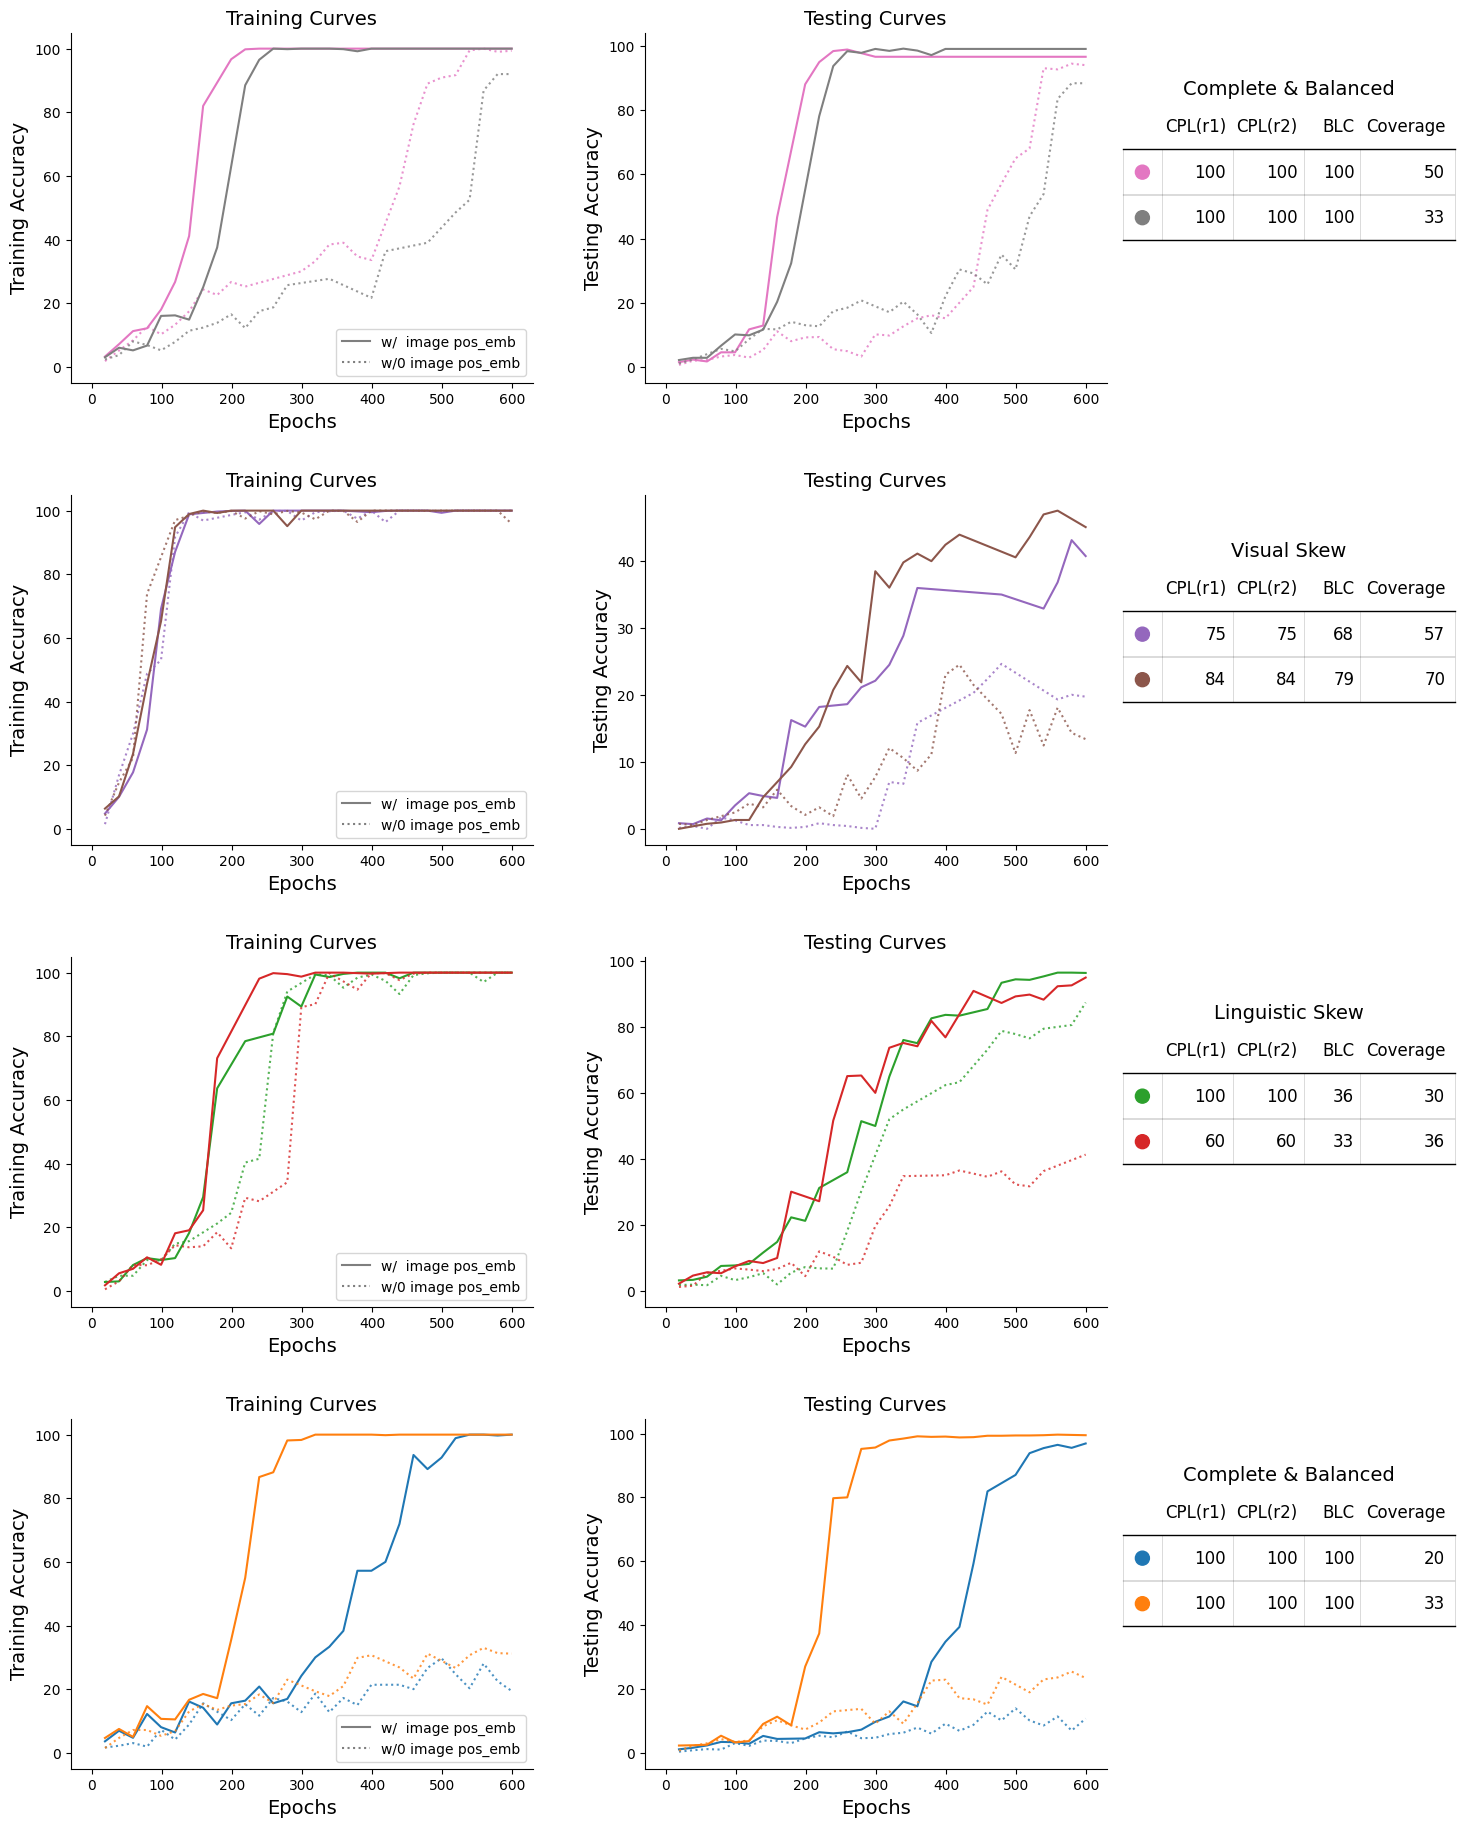

In [74]:
fig = plt.figure(figsize=(14, 14))

column_names = ["legend", "%(O1)", "%(O2)", "Balance", "Coverage"]
Separate_legend = [[24, 22], [21, 19], [17, 20], [8, 23]]
threshold = -6
EPC = list(range(19, 600, 20))

for r, S in enumerate(Separate_legend):
    POSd, NOPOSd = {}, {}
    for j, s in enumerate(S): 
            
        split = f"split{s}"
        POS, NOPOS = get_acc_along_epochs(split, EPC, [30], threshold)
        POSd.update(POS)
        NOPOSd.update(NOPOS) 

    df = pd.DataFrame(columns=column_names)
    
    ax1 = fig.add_axes([0.01, 0.33*r+0.05, 0.33, 0.25])
    ax = fig.add_axes([0.42, 0.33*r+0.05, 0.33, 0.25])
    ax2 = fig.add_axes([0.76, 0.33*r+0.15, 0.24, 0.10])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    for j, k in enumerate(POSd.keys()):
        s = int(k[5:].split("-")[0])
        df.loc[j] = [r*2+j] + [x.split("=")[1].strip() for x in labels[s].split(", ")]
        if j == 0:
            ax.plot([0,0], [0,0], "-", label="w/  image pos_emb", alpha=0.5, color="black")
            ax.plot([0,0], [0,0], ":", label="w/0 image pos_emb", alpha=0.5, color="black")
            ax1.plot([0,0], [0,0], "-", label="w/  image pos_emb", alpha=0.5, color="black")
            ax1.plot([0,0], [0,0], ":", label="w/0 image pos_emb", alpha=0.5, color="black")
        ax.plot([t[0] for t in POSd[k][0]], [t[1] for t in POSd[k][0]], "-", color=CMAP[r*2+j])
        ax.plot([t[0] for t in NOPOSd[k][0]], [t[1] for t in NOPOSd[k][0]], ":", color=CMAP[r*2+j], alpha=0.8)
        ax1.plot([t[0] for t in POSd[k][1]], [t[1] for t in POSd[k][1]], "-", color=CMAP[r*2+j])
        ax1.plot([t[0] for t in NOPOSd[k][1]], [t[1] for t in NOPOSd[k][1]], ":", color=CMAP[r*2+j], alpha=0.8)

    ax.set_title(f"Testing Curves", fontsize=14)
    ax.set_xlabel("Epochs", fontsize=14)
    ax.set_ylabel("Testing Accuracy", fontsize=14)
    #ax.legend(framealpha=0.8, loc='center left')

    ax1.set_title(f"Training Curves", fontsize=14)
    ax1.set_xlabel("Epochs", fontsize=14)
    ax1.set_ylabel("Training Accuracy", fontsize=14)
    ax1.legend(framealpha=0.8, loc='lower right')

    if r==0: title = "Complete & Balanced"
    elif r==1: title = "Linguistic Skew"
    elif r==2: title = "Visual Skew"
    else: title = "Complete & Balanced"
    ax2.set_title(title, fontsize=14)
    df = df.set_index("legend")
    col_defs = [ColumnDefinition(
                name="legend",
                #title="",
                border="left",
                width=0.5,
                textprops={
                    "ha": "center",
                    "bbox": {"boxstyle": "circle", "pad": 0.0},
                    "alpha": 0,
                },
                cmap=matplotlib.cm.tab10, #normed_cmap(df['legend'], cmap=matplotlib.cm.tab10, num_stds=2.5),
            ),
            ColumnDefinition(
                name="%(O1)",
                title="CPL(r1)",
                border="left",
                width=0.9,
                textprops={"ha": "right", "fontsize": 12,},
            ),
            ColumnDefinition(
                name="%(O2)",
                title="CPL(r2)",
                border="left",
                width=0.9,
                textprops={"ha": "right", "fontsize": 12,},
            ),
            ColumnDefinition(
                name="Balance",
                title="BLC",
                border="left",
                width=0.7,
                textprops={"ha": "right", "fontsize": 12,},
            ), 
            ColumnDefinition(
                name="Coverage",
                title="Coverage",
                border="left right",
                width=1.2,
                textprops={"ha": "right", "fontsize": 12},
            )]
    tab = Table(df,
                ax=ax2,
                column_definitions = col_defs,
                column_border_kw={"linewidth": 0.5, "color": "black", "linestyle": "-", "alpha": 0.2},
                footer_divider=True,
                )
    ax2.set_axis_off()

#fig.tight_layout()
plt.show()

In [75]:
fig.savefig(f"figures/ablation_image_pos_emb.png", bbox_inches='tight', dpi=200)

## CLIP vs T5 as Text Encoder

In [1]:
labels = {
    12: "%(O1)=50  , %(O2)=50  , balance=0    , coverage=25",
    13: "%(O1)=100, %(O2)=0    , balance=68  , coverage=50",
    17: "%(O1)=75  , %(O2)=75  , balance=68  , coverage=57",
    20: "%(O1)=84  , %(O2)=84  , balance=79  , coverage=70",
    2: "%(O1)=100, %(O2)=100, balance=71  , coverage=50",
    14: "%(O1)=100, %(O2)=100, balance=79  , coverage=43",
    15: "%(O1)=100, %(O2)=100, balance=84  , coverage=55",
    24: "%(O1)=100, %(O2)=100, balance = 100, coverage=20",
    22: "%(O1)=100, %(O2)=100, balance = 100, coverage=33",
    8: "%(O1)=100, %(O2)=100, balance = 100, coverage=50",
    5: "%(O1)=50  , %(O2)=50  , balance=0    , coverage=25",
    19: "%(O1)=60  , %(O2)=60  , balance=33  , coverage=36",
    21: "%(O1)=100, %(O2)=100, balance=36  , coverage=30",
    7: "%(O1)=100, %(O2)=100, balance=71  , coverage=50",
    23: "%(O1)=100, %(O2)=100, balance=100  , coverage=33",
}

In [2]:
def get_acc_along_epochs(split, EPC, threshold=0.8):
    df = pd.read_csv(f"../data/sheets_icons/diffuser_icons_experiments - {split}.csv",
                    header=0,
                    )
    df = df.dropna(axis='rows', subset='Epoch')
    df.set_index("Epoch", inplace=True)
    df.index = df.index.astype(int)
    od = df.to_dict(into=OrderedDict)

    withT5, withCLIP = {}, {}
    for n in df.columns.to_list():
        if "num_objs=" in n and not '[' in n:
            num_nouns = int(re.findall(r'num_objs=(\d+)', n)[0])

            tmp = [x for x in df.columns.to_list() if f"num_objs={num_nouns}\n[clip]" in x]
            #if "0222_103800" in n: print(df.columns.to_list(), tmp)
            if len(tmp) == 0: continue
            else: withclip_handle = tmp[0]
            
            TEACC, TRACC = [], []
            for epc in EPC:
                if not epc in od[n]: continue
                record = od[n][epc]
                if isinstance(record, NumberTypes) and math.isnan(record): 
                    break
                try: teacc, tracc = re.findall(r'(\d*\.?\d+)\s+tr acc\s?=\s?(\d*\.?\d+)', record)[0]
                except:
                    print(f"failed to regex teacc and tracc from record: {record}")
                    raise
                teacc, tracc = float(teacc), float(tracc)
                if len(TEACC)==0 or teacc >= threshold+TEACC[-1][1]: TEACC.append([epc, teacc])
                if len(TRACC)==0 or tracc >= threshold+TRACC[-1][1]: TRACC.append([epc, tracc])
            if len(TEACC) < len(EPC) and TEACC[-1][1] > 95: TEACC.append([EPC[-1], TEACC[-1][1]])
            if len(TRACC) < len(EPC) and TRACC[-1][1] > 95: TRACC.append([EPC[-1], TRACC[-1][1]])
            withT5[f"{split}-{num_nouns}"] = (TEACC, TRACC)
            
            n = withclip_handle
            TEACC, TRACC = [], []
            for epc in EPC:
                if not epc in od[n]: continue
                record = od[n][epc]
                if isinstance(record, NumberTypes) and math.isnan(record): 
                    break
                try: teacc, tracc = re.findall(r'(\d*\.?\d+)\s+tr acc\s?=\s?(\d*\.?\d+)', record)[0]
                except:
                    print(f"failed to regex teacc and tracc from record: {record}")
                    raise
                teacc, tracc = float(teacc), float(tracc)
                if len(TEACC)==0 or teacc >= threshold+TEACC[-1][1]: TEACC.append([epc, teacc])
                if len(TRACC)==0 or tracc >= threshold+TRACC[-1][1]: TRACC.append([epc, tracc])
            if len(TEACC) < len(EPC) and TEACC[-1][1] > 95: TEACC.append([EPC[-1], TEACC[-1][1]])
            if len(TRACC) < len(EPC) and TRACC[-1][1] > 95: TRACC.append([EPC[-1], TRACC[-1][1]])
            withCLIP[f"{split}-{num_nouns}"] = (TEACC, TRACC)
    return withT5, withCLIP
    

In [8]:
threshold = -7
EPC = list(range(19, 600, 20))
withT5d, withCLIPd = {}, {}
for j, s in enumerate([8, 23, 24]):  
    split = f"split{s}"
    withT5, withCLIP = get_acc_along_epochs(split, EPC, threshold)
    withT5d.update(withT5)
    withCLIPd.update(withCLIP) 
withCLIPd.keys()

dict_keys(['split8-30', 'split23-30', 'split24-30'])

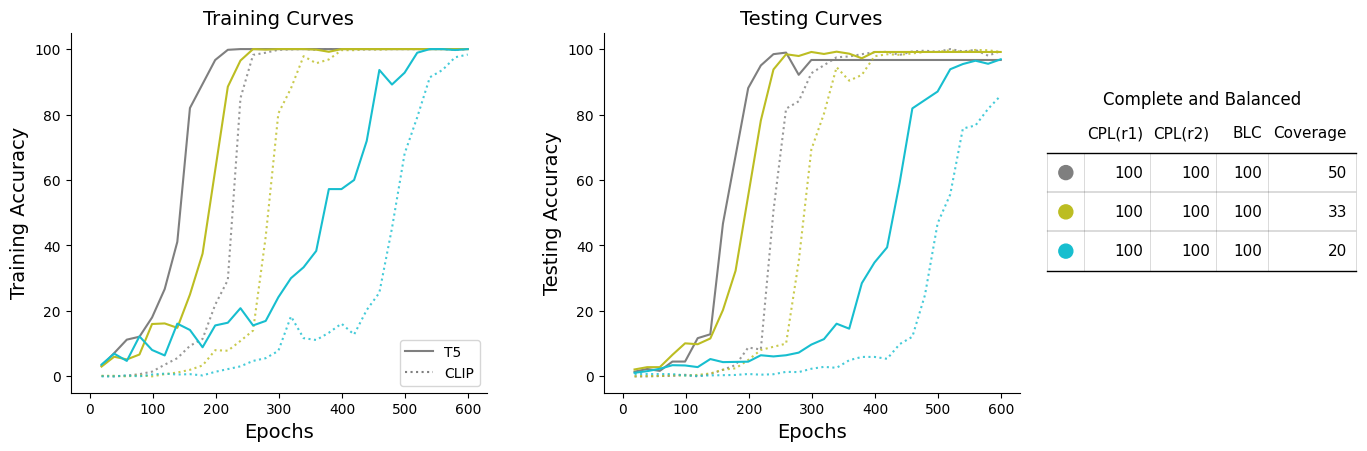

In [9]:
fig = plt.figure(figsize=(13, 4))

column_names = ["legend", "%(O1)", "%(O2)", "Balance", "Coverage"]
df = pd.DataFrame(columns=column_names)
    
#ax = fig.add_subplot(132)
#ax1 = fig.add_subplot(131)
ax1 = fig.add_axes([0.01, 0, 0.32, 0.9])
ax = fig.add_axes([0.42, 0, 0.32, 0.9])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
for j, k in enumerate(withT5d.keys()):
    s = int(k[5:].split("-")[0])
    df.loc[j] = [j+7] + [x.split("=")[1].strip() for x in labels[s].split(", ")]
    if j == 0:
        ax.plot([0,0], [0,0], "-", label="T5", alpha=0.5, color="black")
        ax.plot([0,0], [0,0], ":", label="CLIP", alpha=0.5, color="black")
        ax1.plot([0,0], [0,0], "-", label="T5", alpha=0.5, color="black")
        ax1.plot([0,0], [0,0], ":", label="CLIP", alpha=0.5, color="black")
    ax.plot([t[0] for t in withT5d[k][0]], [t[1] for t in withT5d[k][0]], "-", color=CMAP[j+7])
    ax.plot([t[0] for t in withCLIPd[k][0]], [t[1] for t in withCLIPd[k][0]], ":", color=CMAP[j+7], alpha=0.8)
    ax1.plot([t[0] for t in withT5d[k][1]], [t[1] for t in withT5d[k][1]], "-", color=CMAP[j+7])
    ax1.plot([t[0] for t in withCLIPd[k][1]], [t[1] for t in withCLIPd[k][1]], ":", color=CMAP[j+7], alpha=0.8)

ax.set_title(f"Testing Curves", fontsize=14)
ax.set_xlabel("Epochs", fontsize=14)
ax.set_ylabel("Testing Accuracy", fontsize=14)
#ax.legend(framealpha=0.8, loc='center left')

ax1.set_title(f"Training Curves", fontsize=14)
ax1.set_xlabel("Epochs", fontsize=14)
ax1.set_ylabel("Training Accuracy", fontsize=14)
ax1.legend(framealpha=0.8, loc='lower right')

ax2 = fig.add_axes([0.76, 0.3, 0.24, 0.4])
ax2.set_title("Complete and Balanced")
df = df.set_index("legend")
col_defs = [ColumnDefinition(
            name="legend",
            #title="",
            border="left",
            width=0.5,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.0},
                "alpha": 0,
            },
            cmap=matplotlib.cm.tab10, #normed_cmap(df['legend'], cmap=matplotlib.cm.tab10, num_stds=2.5),
        ),
        ColumnDefinition(
            name="%(O1)",
            title="CPL(r1)",
            border="left",
            width=0.9,
            textprops={"ha": "right", "fontsize": 11,},
        ),
        ColumnDefinition(
            name="%(O2)",
            title="CPL(r2)",
            border="left",
            width=0.9,
            textprops={"ha": "right", "fontsize": 11,},
        ),
        ColumnDefinition(
            name="Balance",
            title="BLC",
            border="left",
            width=0.7,
            textprops={"ha": "right", "fontsize": 11,},
        ), 
        ColumnDefinition(
            name="Coverage",
            title="Coverage",
            border="left right",
            width=1.2,
            textprops={"ha": "right", "fontsize": 11},
        )]
tab = Table(df,
            ax=ax2,
            column_definitions = col_defs,
            column_border_kw={"linewidth": 0.5, "color": "black", "linestyle": "-", "alpha": 0.2},
            footer_divider=True,
            )
ax2.set_axis_off()

#fig.tight_layout()
plt.show()

In [10]:
fig.savefig(f"figures/ablation_clip.png", bbox_inches='tight', dpi=200)

## Whatsup Images Experiment

In [33]:
SCORES = {
    'D': [100, 100, 100, 48],
    'F': [100, 100, 100, 53],
    'I': [100, 100, 80, 37],
    'J': [100, 100, 100, 53],
    'K': [100, 100, 100, 44],
    'G': [50, 100, 63, 47],
    'A': [80, 73, 77, 50],
    'B': [87, 87, 75, 49],
    'H': [100, 100, 73, 44],
    'C': [93, 93, 82, 47],
    'E': [100, 100, 88, 49],
    'Z': [100, 50, 63, 47],
    'U': [80, 73, 77, 50],
    'V': [87, 87, 75, 49],
    'T': [100, 100, 73, 44],
    'W': [93, 93, 82, 47],
    'X': [100, 100, 88, 49],
}
COVERAGES = {
    'D': 200,
    'F': 224,
    'I': 154,
    'J': 224,
    'K': 184,
    'G': 196,
    'A': 210,
    'B': 204,
    'H': 184,
    'C': 196,
    'E': 206,
    'Z': 196,
    'U': 210,
    'V': 204,
    'T': 184,
    'W': 196,
    'X': 206
}

In [16]:
def get_gaps(sheet_name, EPC):
    df = pd.read_csv(f"../data/sheets_icons/diffuser_icons_experiments - {sheet_name}.csv",
                    header=0,
                    )
    df = df.dropna(axis='rows', subset='Epoch')
    df.set_index("Epoch", inplace=True)
    df.index = df.index.astype(int)
    od = df.to_dict(into=OrderedDict)
    gap_res, wholeacc_res = [], []
    #print(od["0305_020237\nsplitC"])
    
    for n in df.columns.to_list():
        if "horizontal" in n: continue
        if "split" in n:
            s = re.findall(r'split([A-Z])', n)[0]
            #if s not in N: continue
            gap = 0
            TEACC, TRACC = [], []
            for epc in EPC:
                if not epc in od[n]: continue
                record = od[n][epc]
                if isinstance(record, NumberTypes) and math.isnan(record): 
                    break
                try: teacc, tracc = re.findall(r'(\d*\.?\d+)\s+tr acc\s?=\s?(\d*\.?\d+)', record)[0]
                except:
                    print(f"failed to regex teacc and tracc from record: {record}")
                    raise
                TEACC.append(float(teacc))
                TRACC.append(float(tracc))
            if len(TEACC) == 0: continue
            #assert len(TEACC) == len(EPC)
            gap = np.sum([r-e for r, e in zip(TRACC, TEACC)])
            #wholeacc = np.max([(r*COVERAGES[s]+e*(420-COVERAGES[s]))/420 for r, e in zip(TRACC, TEACC)])
            wholeacc = np.max(TEACC)
            gap_res.append((s, round(gap/len(TEACC), 2), n))
            wholeacc_res.append((s, round(wholeacc, 2), n))
    gap_res = sorted(gap_res, key=lambda i: (i[0], i[-1]))
    wholeacc_res = sorted(wholeacc_res, key=lambda i: (i[0], i[-1]))
    return gap_res, wholeacc_res
    

In [34]:
EPC = list(range(199, 6000, 200))
sheet_name = "whatsup_results_updated"
gap_res, wholeacc_res = get_gaps(sheet_name, EPC)

In [37]:
GAPS = {i[0]: i[1] for i in gap_res}
WHOLEACCS = {i[0]: i[1] for i in wholeacc_res}
column_names = ["legend", "CPL(r1)", "CPL(r2)", "BLC", "Coverage", "Final testing acc", "Accmulative train-test acc gap"]
df = pd.DataFrame(columns=column_names)

meaning = "Visual"
K = "GABHIE" if meaning == "Linguistic" else "ZUVTXD"
for j, s in enumerate(K):
    df.loc[j] = [int(j)] + [str(x) for x in SCORES[s]] + [WHOLEACCS[s], str(GAPS[s])]
df = df.set_index("legend")

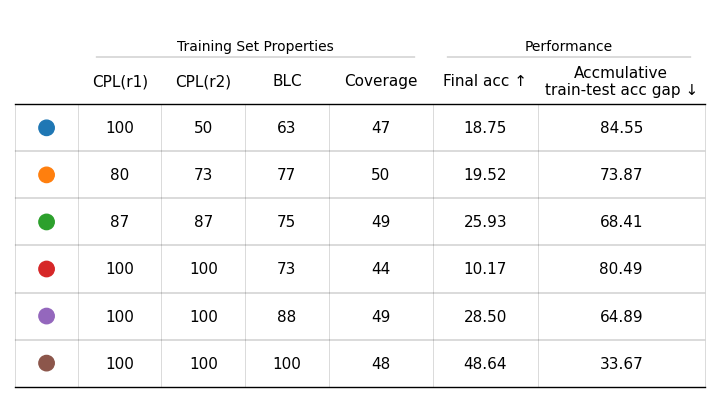

In [38]:
fig = plt.figure(figsize=(7, 4))
#ax = plt.axes([0, 0.05, 1, 1])
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax = plt.axes([0, 0.5, 1, 0.95])

col_defs = [
        ColumnDefinition(
            name="legend",
            border="left",
            width=0.3,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.05},
                "alpha": 0,
            },
            cmap=matplotlib.cm.tab10, #normed_cmap(df['legend'], cmap=matplotlib.cm.tab10, num_stds=2.5),
        ),
        ColumnDefinition(
            name="CPL(r1)",
            border="left",
            width=0.4,
            textprops={"ha": "center", "fontsize": 11,},
            group="Training Set Properties",
        ),
        ColumnDefinition(
            name="CPL(r2)",
            border="left",
            width=0.4,
            textprops={"ha": "center", "fontsize": 11,},
            group="Training Set Properties",
        ),
        ColumnDefinition(
            name="BLC",
            border="left",
            width=0.4,
            textprops={"ha": "center", "fontsize": 11,},
            group="Training Set Properties",
        ), 
        ColumnDefinition(
            name="Coverage",
            border="left",
            width=0.5,
            textprops={"ha": "center", "fontsize": 11},
            group="Training Set Properties",
        ),
        ColumnDefinition(
            name="Final testing acc",
            title=u"Final acc \u2191",
            formatter="{:.2f}",
            border="left",
            width=0.5,
            textprops={"ha": "center", "fontsize": 11},
            group="Performance",
        ),
        ColumnDefinition(
            name="Accmulative train-test acc gap",
            title="Accmulative\ntrain-test acc gap \u2193",
            border="left right",
            width=0.8, 
            textprops={"ha": "center", "fontsize": 11},
            group="Performance",
        )]
tab = Table(df,
            ax=ax,
            column_definitions = col_defs,
            column_border_kw={"linewidth": 0.5, "color": "black", "linestyle": "-", "alpha": 0.2},
            footer_divider=True,
            )

#plt.title(f"{meaning} Roles")
plt.show()

In [30]:
fig.savefig(f"figures/whatsup_{meaning}.png", bbox_inches='tight', dpi=150)

## 90 Unicode and their names (Appendix)

In [1]:
from PIL import Image, ImageDraw, ImageFont
import json, random, os, sys
sys.path.append("../scripts/diffuser_icons/")
import numpy as np


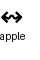

In [18]:
im = Image.new("RGB", (40, 60), (255,255,255))
draw = ImageDraw.Draw(im)
unicode_text = "\u21ad"
unicode_font = ImageFont.truetype("DejaVuSans.ttf", 28)
draw.text((0,0), unicode_text, font=unicode_font, fill="black")
draw.text((0, 30), "apple", fill="black")
im

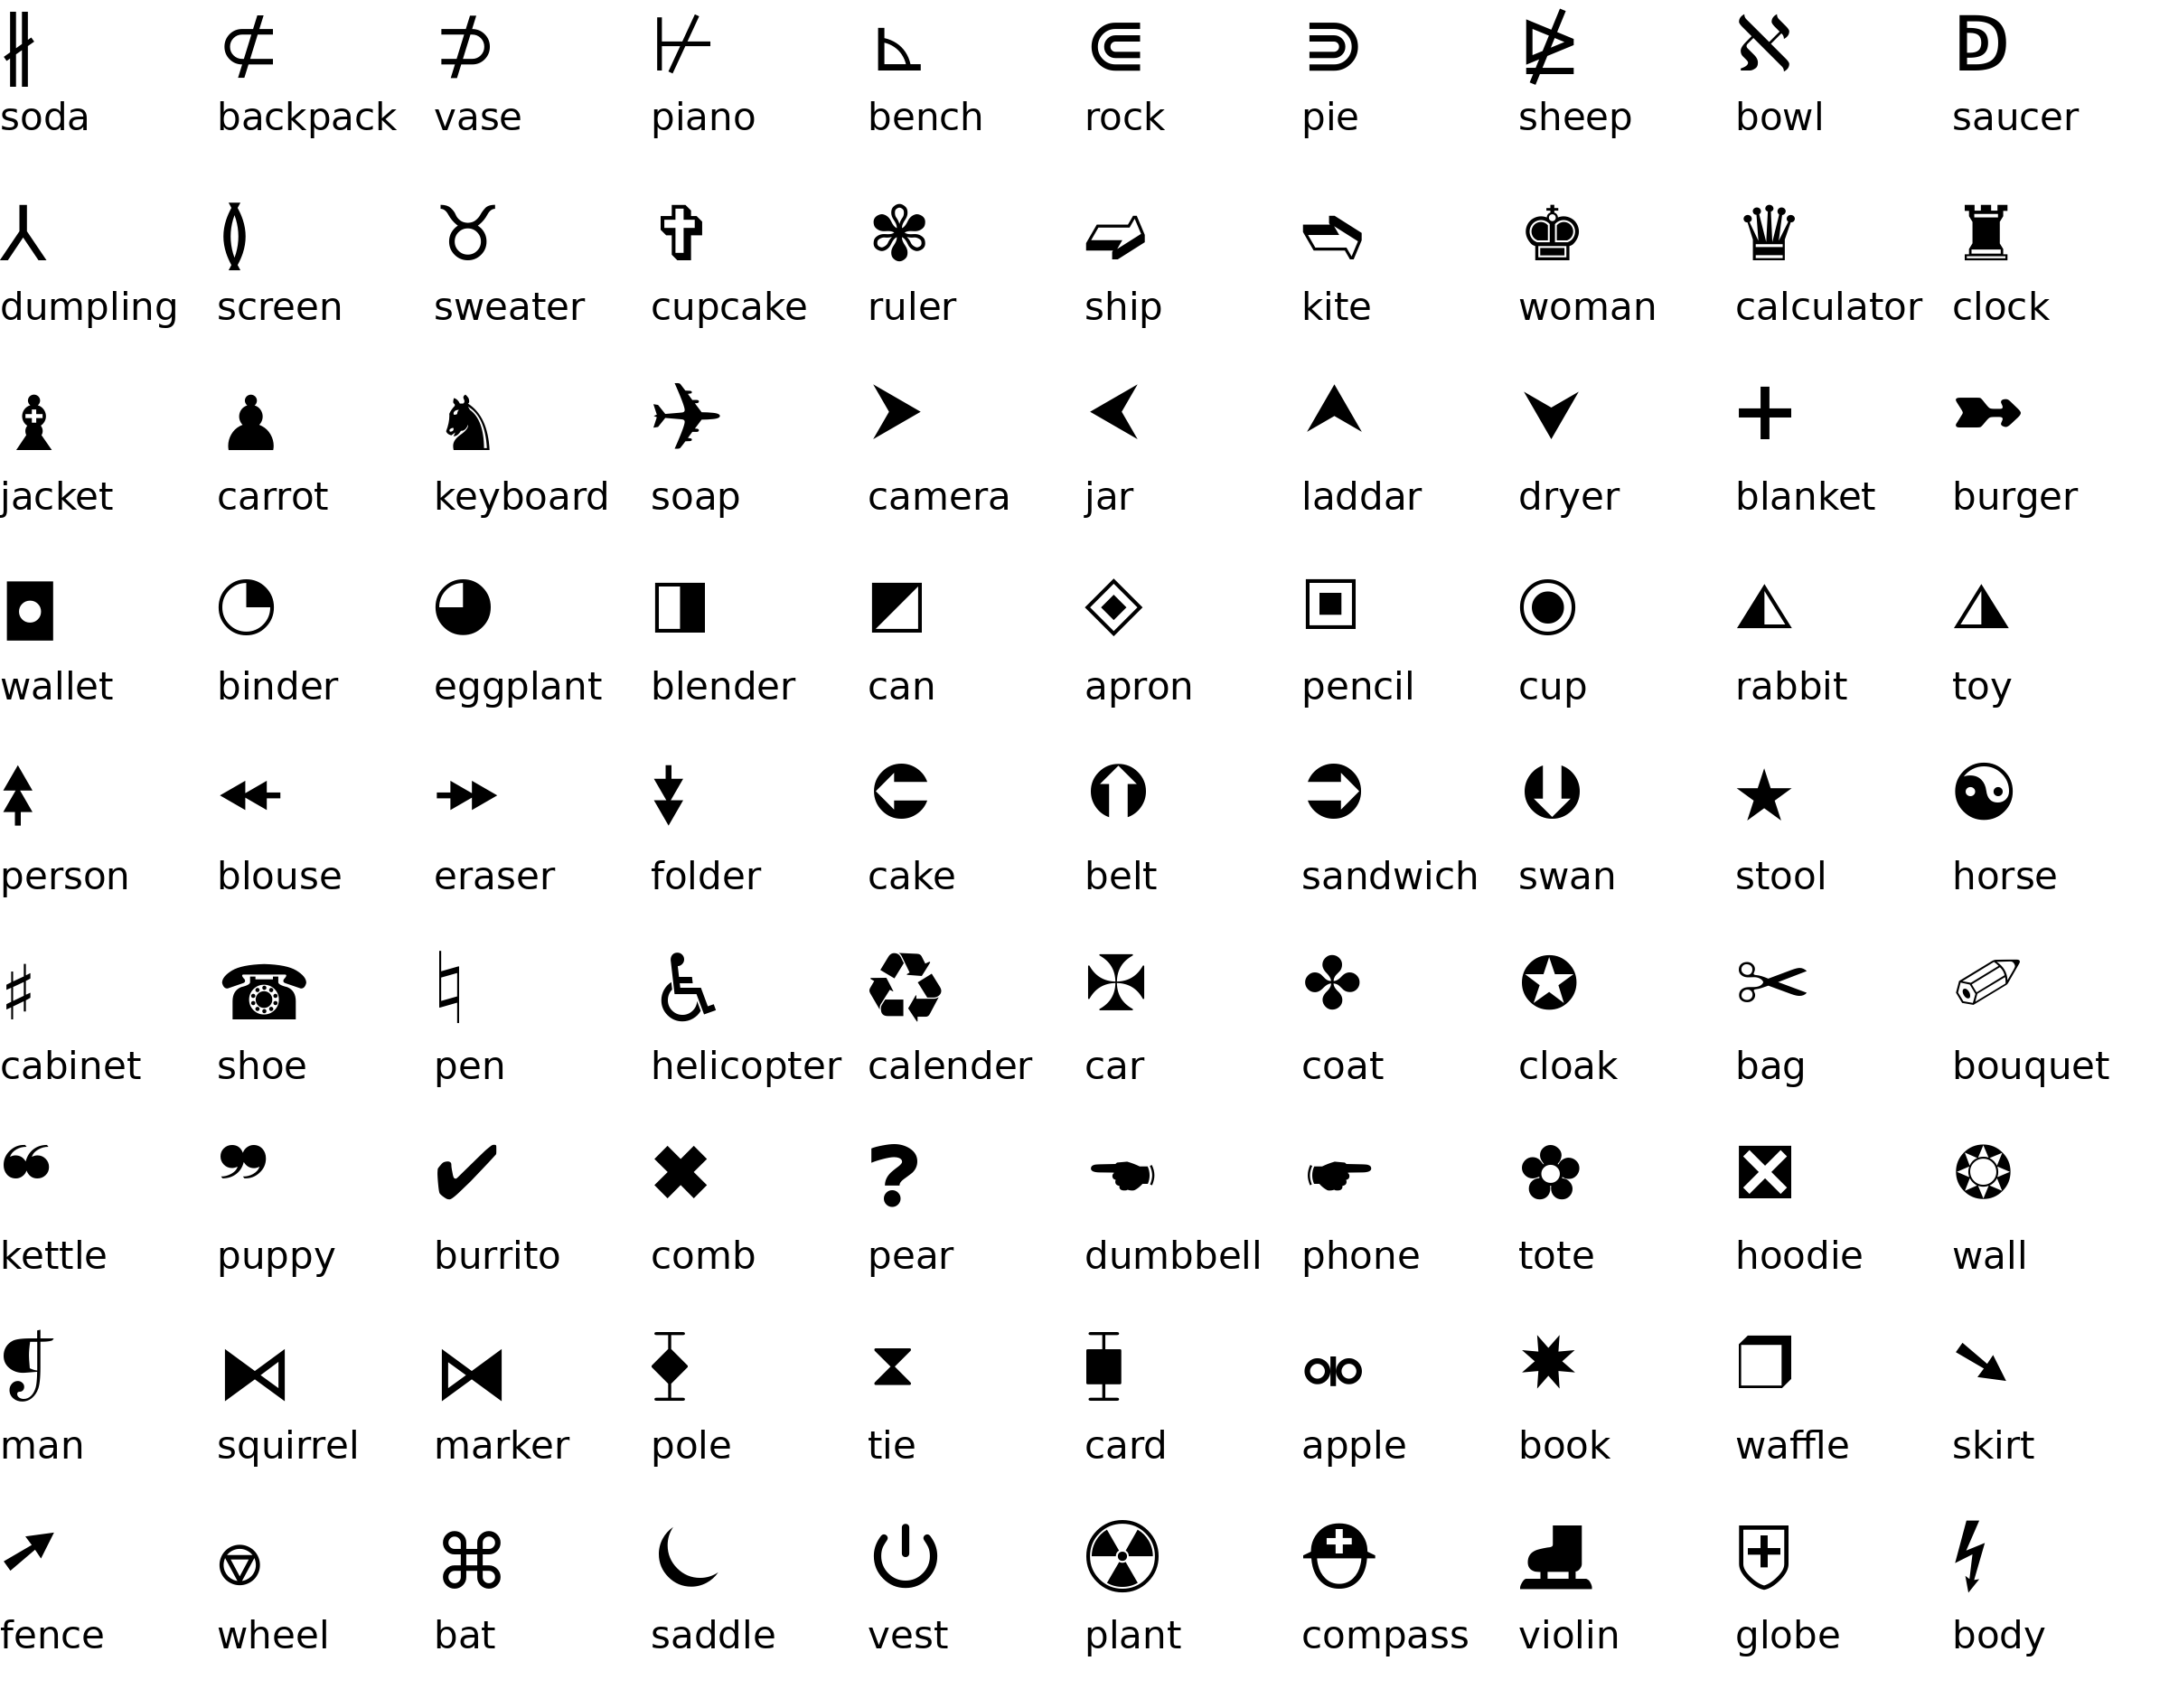

In [27]:
with open("../data/matplotlib/unicode.jsonl", "r", encoding="unicode-escape") as f: lines = f.readlines()[:90]
with open("../data/nouns/all_nouns.txt", "r") as f: nouns = [x.strip() for x in f.readlines()[:90]]
scale=3

im = Image.new("RGB", (800*scale, 630*scale), (255,255,255))
draw = ImageDraw.Draw(im)
for i, l in enumerate(lines):
    unicode_text, _, font = json.loads(l)
    unicode_font = ImageFont.truetype(f"../scripts/diffuser_icons/fonts/{font}.ttf", 28*scale)
    draw.text((80*(i%10)*scale,70*(i//10)*scale), unicode_text, font=unicode_font, fill="black")
    text_font = font = ImageFont.truetype("DejaVuSans.ttf", 14*scale)
    draw.text((80*(i%10)*scale, (70*(i//10)+35)*scale), nouns[i], fill="black", font=text_font)

im.save(f"figures/unicode.pdf")
im

## ViT Finetuning Examples

In [24]:
from PIL import Image
from matplotlib import pyplot as plt
import os


In [12]:
def read_image(impath, imagesize = (960, 960)):
    image = Image.open(impath)
    width, height = imagesize
    new_dimension = min(imagesize)
    left = (width - new_dimension)/2
    top = (height - new_dimension)/2
    right = (width + new_dimension)/2
    bottom = (height + new_dimension)/2
    image = image.crop((left, top, right, bottom))#.resize((self.imsize, self.imsize))
    crop1 = image.crop((0, new_dimension//4, new_dimension//2, 3*new_dimension//4))
    crop2 = image.crop((new_dimension//2, new_dimension//4, new_dimension, 3*new_dimension//4))
    return crop1, crop2

In [139]:
classes = ['book', 'bowl', 'can', 'cap', 'cup', 'mug', 'plate', 'candle', 'flower', 'fork', 'headphones', 'knife', 'scissors', 'spoon', 'tape']
imdir = "/data/yingshac/clevr_control/data/whatsup_vlms/controlled_clevr"
filenames = [
    "cap_left_of_headphones",
    "mug_left_of_candle",
    "book_left_of_headphones",
    "mug_left_of_headphones",
    "cup_left_of_scissors",
    "can_left_of_scissors",
    "mug_left_of_flower",
    "can_left_of_spoon",
    "can_left_of_flower",
    "plate_left_of_sunglasses",
    "mug_left_of_tape",
    "cup_left_of_knife",
    "cup_left_of_fork",
    "bowl_left_of_sunglasses",
]

In [140]:
images = {}
for f in filenames:
    crop1, crop2 = read_image(os.path.join(imdir, f+".jpeg"))
    f1, f2 = f.split("_")[0], f.split("_")[-1]
    images[f1] = crop1
    images[f2] = crop2
print(len(images))

16


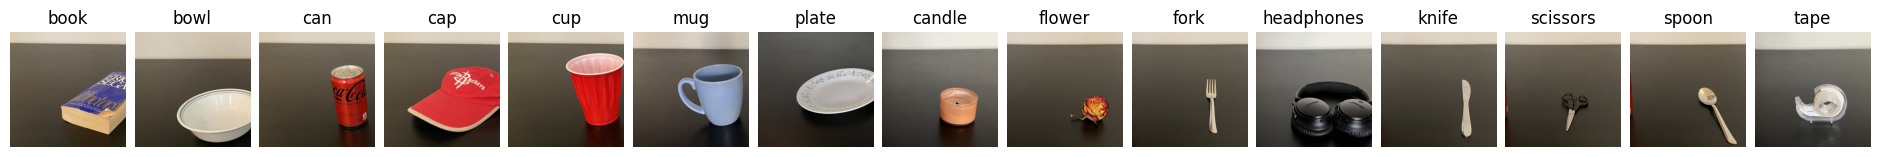

In [150]:
fig, axs = plt.subplots(1, 15, figsize=(24, 4))
axs = axs.flatten()
for c, ax in zip(classes, axs):
    ax.imshow(images[c])
    ax.set_title(c)
    ax.set_axis_off()
    
plt.subplots_adjust(wspace=0.08)
plt.show()

In [151]:
fig.savefig(f"figures/finetune_vit_examples.png", bbox_inches='tight', dpi=200)